# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

# Load the dataset files

In [3]:
#loading the file
app_data= pd.read_csv("application_data.csv")
prev_app_data=pd.read_csv("previous_application.csv")
col_dcp = pd.read_csv("columns_description.csv", encoding='latin-1')


In [4]:
col_dcp

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


# Application data analysis

In [5]:
## Performing initial data exploration

app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
app_data.shape

(307511, 122)

In [7]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [9]:
columns_list = app_data.columns.tolist()

# Print the full list of columns
for column in columns_list:
    print(column)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [10]:
#looking at the null values in the data set
null_val=app_data.isnull().sum()
null_val


SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [11]:
#finding the null value percentage

null_val_pct = (app_data.isnull().sum() / app_data.shape[0]) * 100
null_val_pct = null_val_pct.sort_values(ascending=True)
null_val_pct

SK_ID_CURR                       0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
FLAG_DOCUMENT_21                 0.000000
FLAG_DOCUMENT_20                 0.000000
FLAG_DOCUMENT_19                 0.000000
FLAG_DOCUMENT_18                 0.000000
FLAG_DOCUMENT_17                 0.000000
FLAG_DOCUMENT_16                 0.000000
FLAG_DOCUMENT_15                 0.000000
FLAG_DOCUMENT_14                 0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_DOCUMENT_12                 0.000000
FLAG_DOCUMENT_11                 0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_7                  0.000000
FLAG_DOCUMENT_6                  0

In [12]:
#values which has null values more than 40 percent are of no use so we are gonna drop them
limit= 40
drop_column= null_val_pct[null_val_pct>limit].index

In [13]:
drop_column.size

49

In [14]:
filtered_app_data=app_data.drop(columns=drop_column)
filtered_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
app_data.shape

(307511, 122)

In [16]:
filtered_app_data.shape

(307511, 73)

In [17]:
null_val_pct = filtered_app_data.isnull().sum().sort_values(ascending=True)

In [18]:
null_val_pct

SK_ID_CURR                         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_7                    0
FLAG_DOCUMENT_8                    0
FLAG_DOCUMENT_9                    0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_12                   0
FLAG_DOCUMENT_13                   0
FLAG_DOCUMENT_14                   0
FLAG_DOCUMENT_15                   0
FLAG_DOCUMENT_16                   0
FLAG_DOCUMENT_17                   0
FLAG_DOCUMENT_18                   0
FLAG_DOCUMENT_19                   0
FLAG_DOCUMENT_20                   0
F

# Dropping the useless columns


As going through the column description it is very much clear that these bunch of columns are not necessary to incluede in the analysis

In [19]:

 useless_col = ['WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
    'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
    'SK_ID_PREV', 'NAME_CONTRACT_TYPE',
    'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT',
    'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
    'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
    'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
    'NFLAG_MICRO_CASH', 'RATE_DOWN_PAYMENT',
    'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
    'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
    'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
    'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
    'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
    'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
    'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
    'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
    'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


existing_cols = [col for col in useless_col if col in filtered_app_data.columns]
filtered_app_data = filtered_app_data.drop(columns=existing_cols)

In [20]:
#we can see that the column number has decreased by dropping the useless ones.
filtered_app_data .shape

(307511, 35)

In [21]:
filtered_app_data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']].head()


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION
0,-9461,-637,-3648.0
1,-16765,-1188,-1186.0
2,-19046,-225,-4260.0
3,-19005,-3039,-9833.0
4,-19932,-3038,-4311.0


In [22]:
filtered_app_data['DAYS_BIRTH'] = filtered_app_data['DAYS_BIRTH'].abs()
filtered_app_data['DAYS_EMPLOYED'] = filtered_app_data['DAYS_EMPLOYED'].abs()
filtered_app_data['DAYS_REGISTRATION'] = filtered_app_data['DAYS_REGISTRATION'].abs()
filtered_app_data['DAYS_ID_PUBLISH'] = filtered_app_data['DAYS_REGISTRATION'].abs()


In [23]:
filtered_app_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,M,N,Y,0,202500.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,3648.0,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376
1,100003,0,F,N,N,0,270000.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,1186.0,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,NaN
2,100004,0,M,Y,Y,0,67500.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,4260.0,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567
3,100006,0,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,9833.0,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN
4,100007,0,M,N,Y,0,121500.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,4311.0,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,NaN


null_val_pct

In [24]:
 filtered_null_val= filtered_app_data.isnull().sum().sort_values(ascending=True)

In [25]:
filtered_app_data[['CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3','OCCUPATION_TYPE']].head()


,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OCCUPATION_TYPE
0,1.0,0.262949,0.139376,Laborers
1,2.0,0.622246,NaN,Core staff
2,1.0,0.555912,0.729567,Laborers
3,2.0,0.650442,NaN,Laborers
4,1.0,0.322738,NaN,Core staff


In [26]:
filtered_app_data['CNT_FAM_MEMBERS'].fillna(filtered_app_data['CNT_FAM_MEMBERS'].mean(), inplace=True)


The 'CNT_FAM_MEMBERS' column represents the count of family members. Since there are only 2 missing values in this column, we can replace them with the mean value of the non-null entries. This approach allows us to preserve the overall distribution and central tendency of the data.

In [27]:
filtered_app_data['EXT_SOURCE_2'].fillna(filtered_app_data['EXT_SOURCE_2'].median(), inplace=True)


The 'EXT_SOURCE_2' column contains numeric values that represent a source of information about the applicant. With 660 missing values, we can fill them with the median value. The median is a suitable choice as it is less sensitive to outliers and provides a representative value for the missing entries.

In [28]:
filtered_app_data['EXT_SOURCE_3'].fillna(filtered_app_data['EXT_SOURCE_3'].median(), inplace=True)


Similar to 'EXT_SOURCE_2', the 'EXT_SOURCE_3' column also represents a source of information. With 60,965 missing values, we again opt to fill them with the median. This ensures that the missing values are replaced with a central and representative value.

In [29]:
filtered_app_data['OCCUPATION_TYPE'].fillna(filtered_app_data['OCCUPATION_TYPE'].mode()[0], inplace=True)


The 'OCCUPATION_TYPE' column indicates the occupation of the applicant. With 96,391 missing values, we use the mode (most frequent value) to fill them. This approach assigns the most common occupation type to the missing values, allowing us to retain the prevailing occupation categories in the data.

In [30]:
 filtered_app_data['OCCUPATION_TYPE'].fillna('Not Available', inplace=True)


'Not Available' is used to replace missing values in 'OCCUPATION_TYPE' to indicate that occupation information is missing and allow for transparency in the analysis.

In [31]:
filtered_app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_N

In [32]:
filtered_app_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,M,N,Y,0,202500.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,3648.0,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376
1,100003,0,F,N,N,0,270000.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,1186.0,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,0.535276
2,100004,0,M,Y,Y,0,67500.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,4260.0,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567
3,100006,0,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,9833.0,1,1,0,1,0,0,Laborers,2.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276
4,100007,0,M,N,Y,0,121500.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,4311.0,1,1,0,1,0,0,Core staff,1.0,2,2,0,0,0,0,1,1,Religion,0.322738,0.535276


In [33]:
filtered_app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3'],
      dtype='object')

In [34]:
data_types = filtered_app_data.dtypes
print(data_types)

SK_ID_CURR                       int64
TARGET                           int64
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CI

# Handling Outliers

In [35]:
filtered_app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3
count,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,0.020868,16036.995067,67724.742149,4986.120328,4986.120328,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.145034e-01,0.515695
std,102790.175348,0.272419,0.722121,2.371231e+05,0.013831,4363.988632,139443.751806,3522.886321,3522.886321,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910679,0.509034,0.502737,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908699e-01,0.174736
min,100002.000000,0.000000,0.000000,2.565000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527
25%,189145.500000,0.000000,0.000000,1.125000e+05,0.010006,12413.000000,933.000000,2010.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.929737e-01,0.417100
50%,278202.000000,0.000000,0.000000,1.471500e+05,0.018850,15750.000000,2219.000000,4504.000000,4504.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.659614e-01,0.535276
75%,367142.500000,0.000000,1.000000,2.025000e+05,0.028663,19682.000000,5707.000000,7479.500000,7479.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.634218e-01,0.636376
max,456255.000000,1.000000,19.000000,1.170000e+08,0.072508,25229.000000,365243.000000,24672.000000,24672.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.549997e-01,0.896010


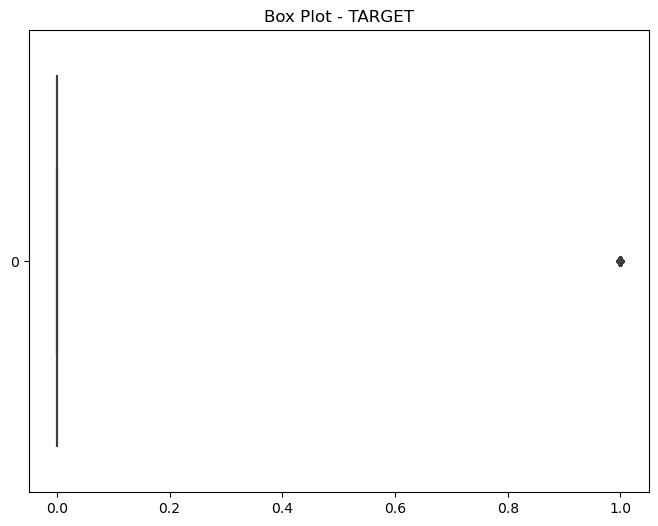

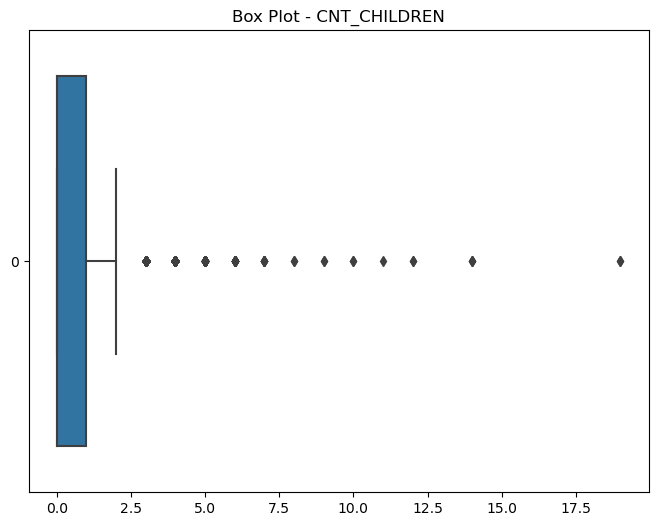

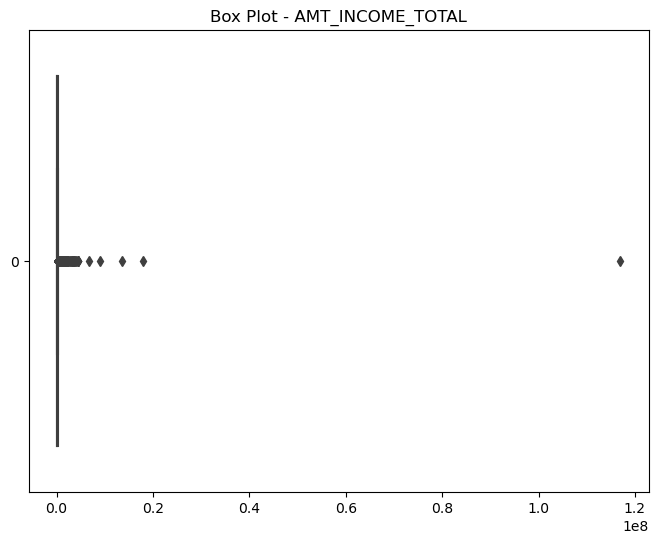

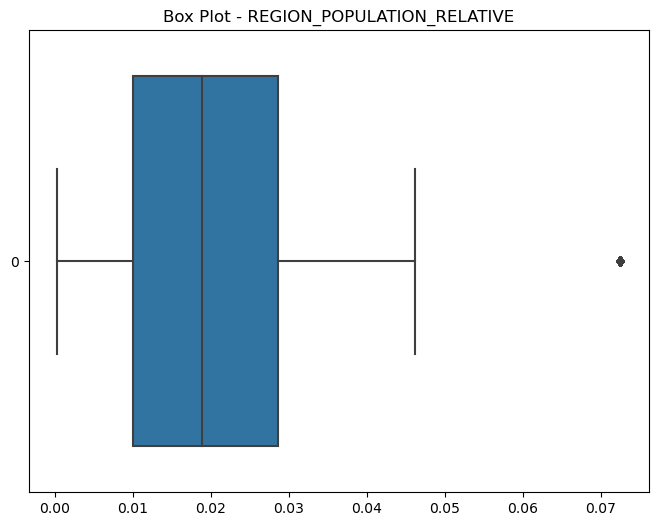

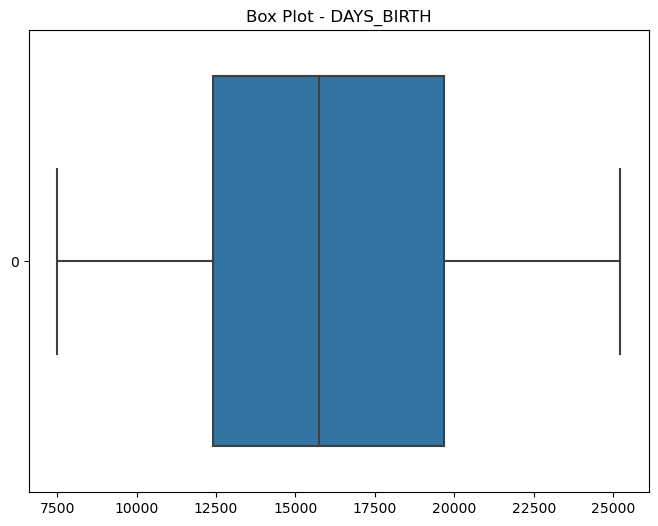

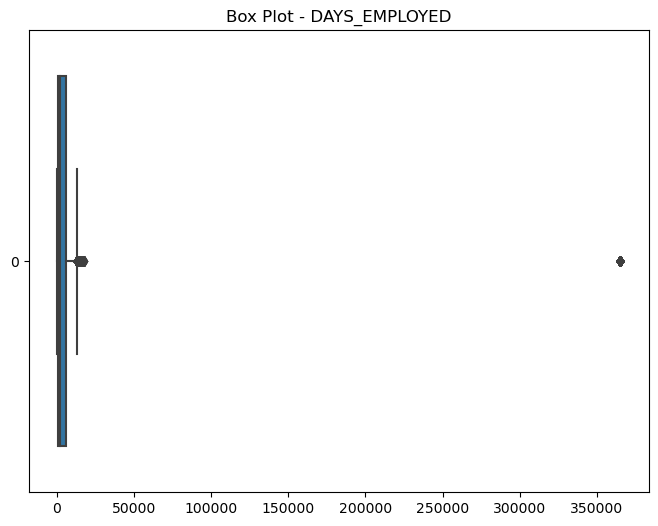

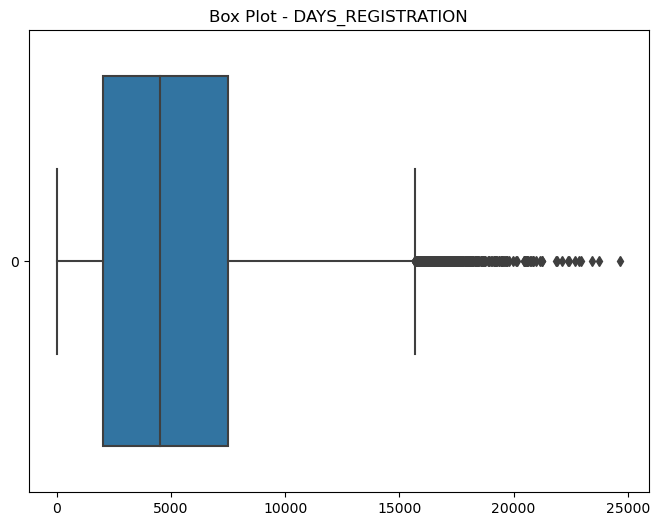

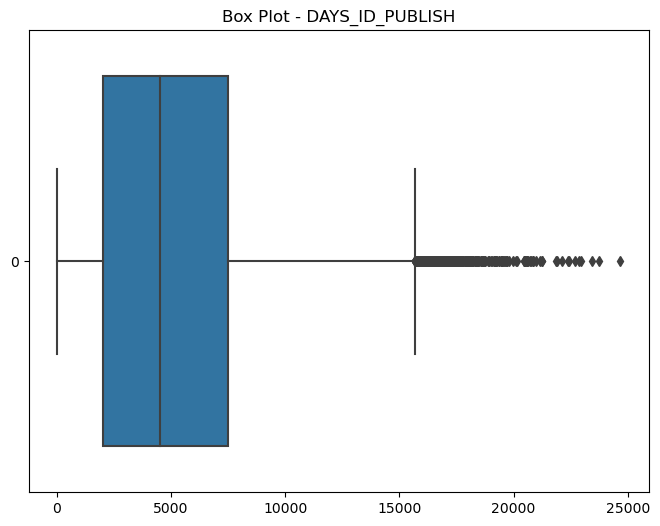

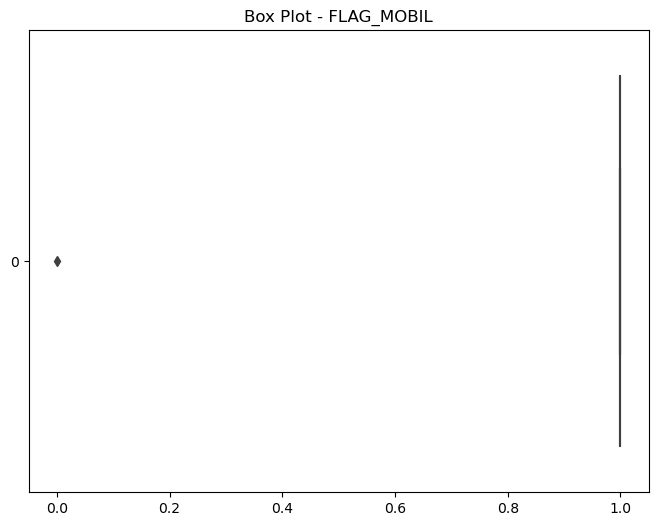

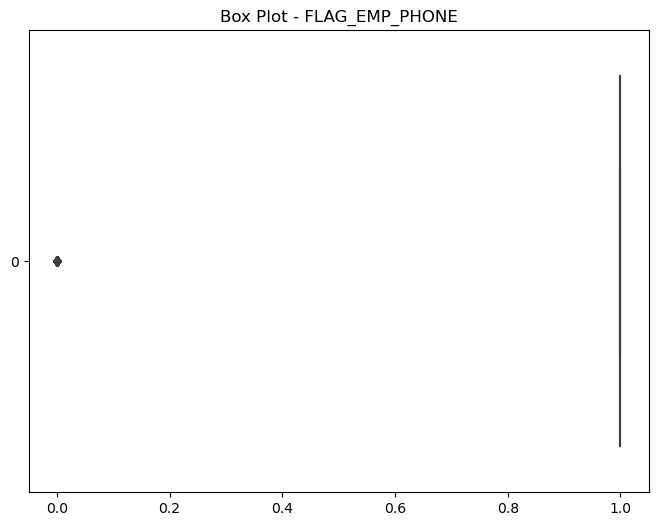

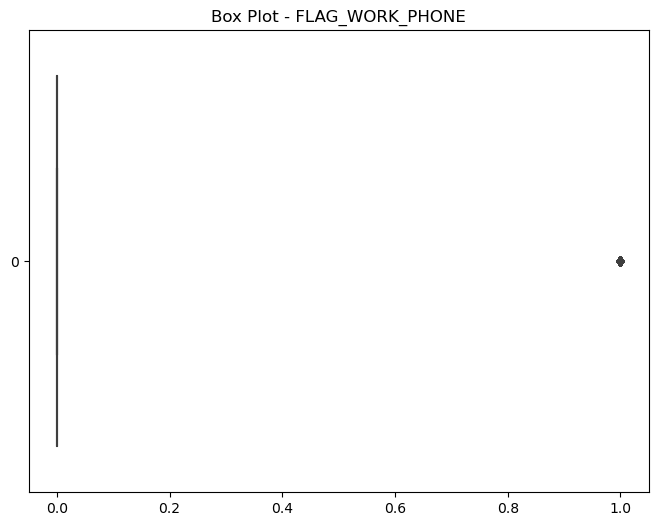

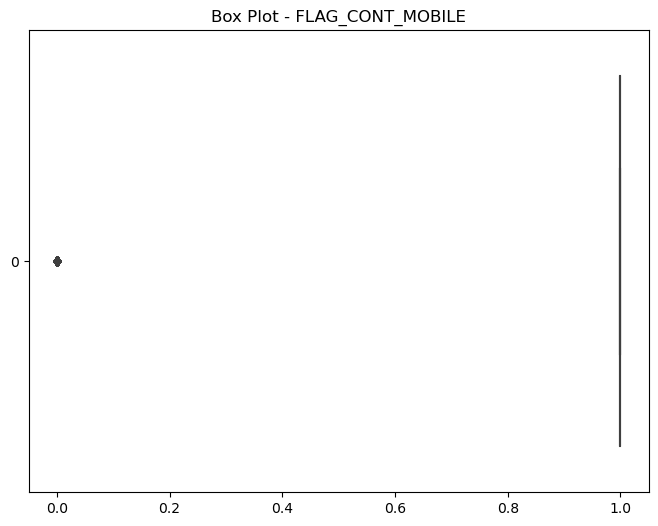

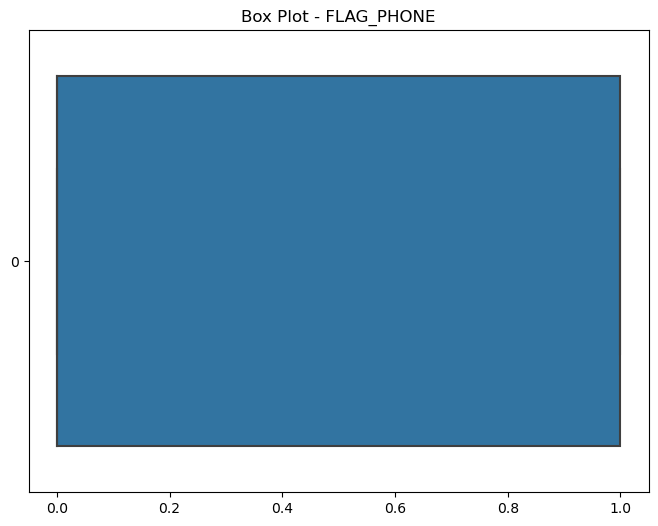

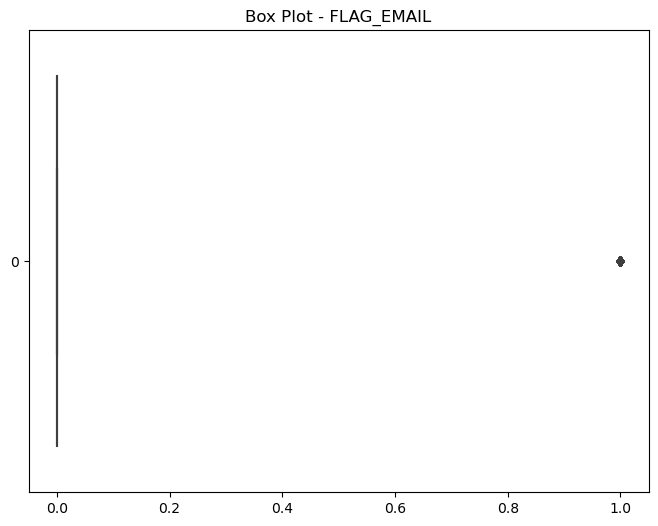

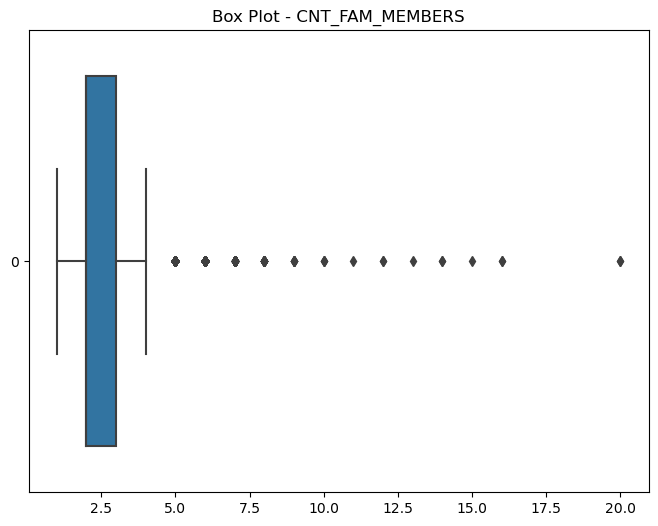

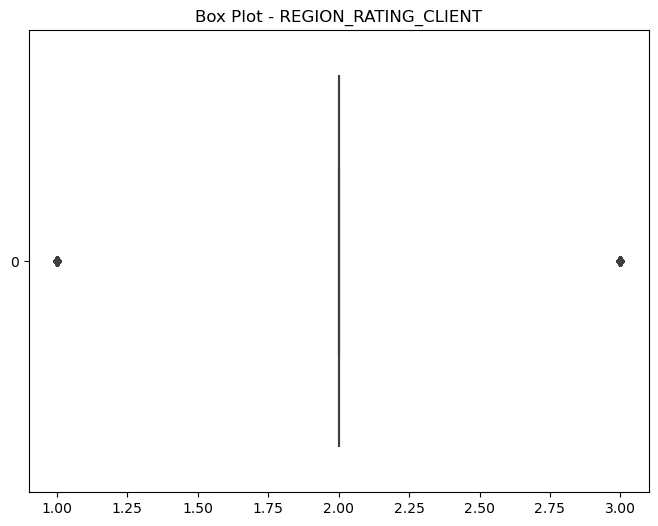

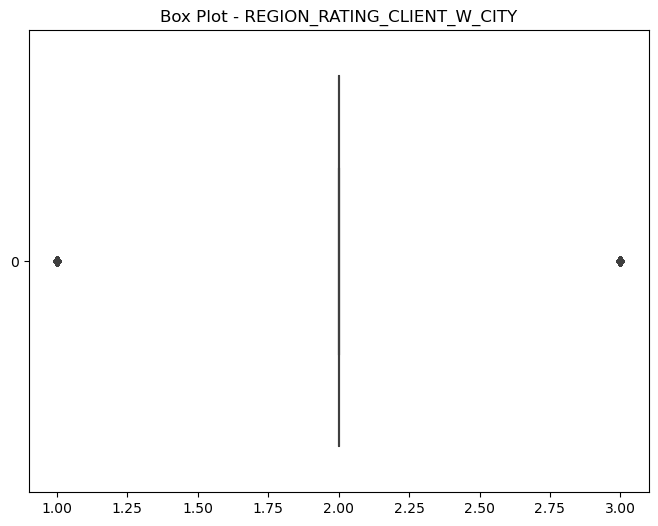

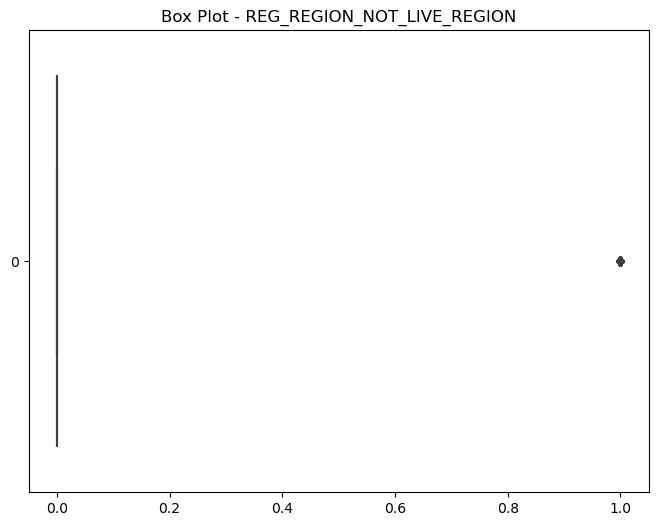

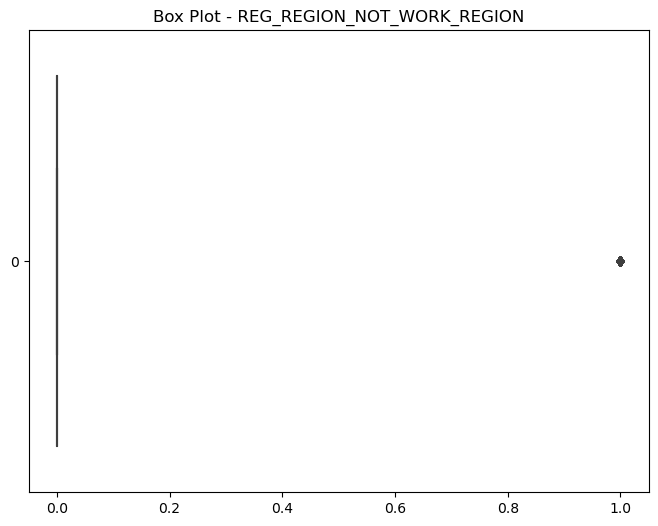

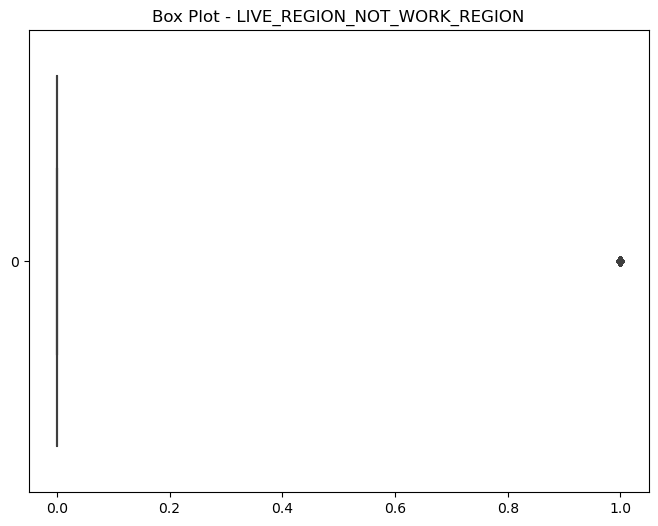

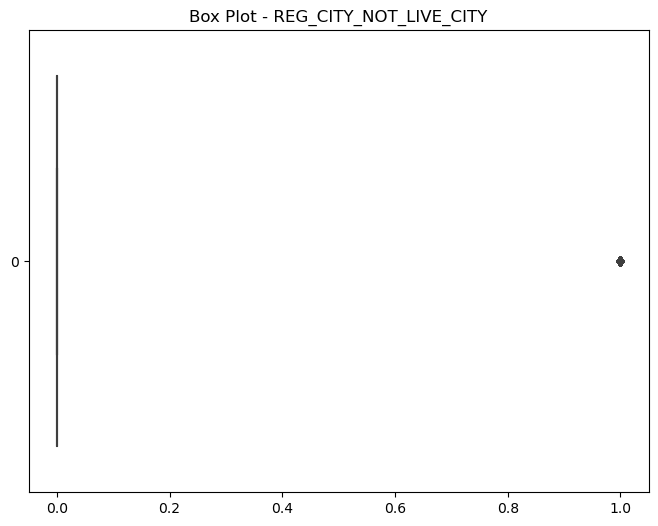

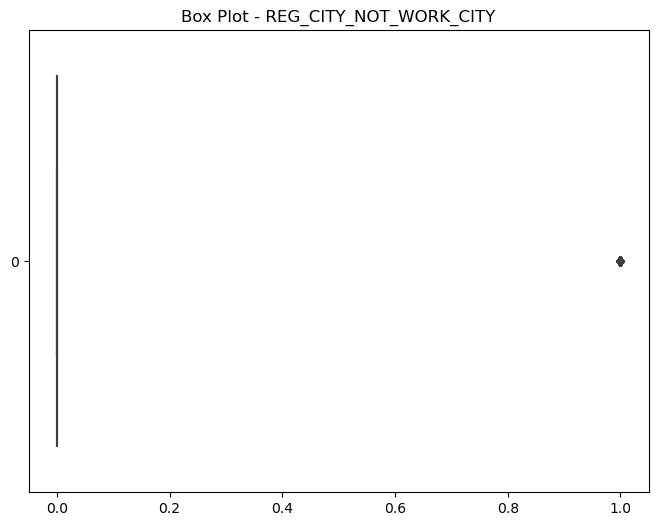

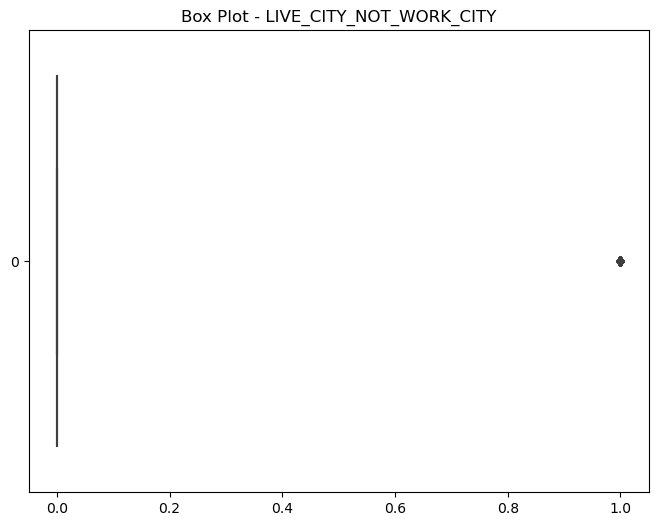

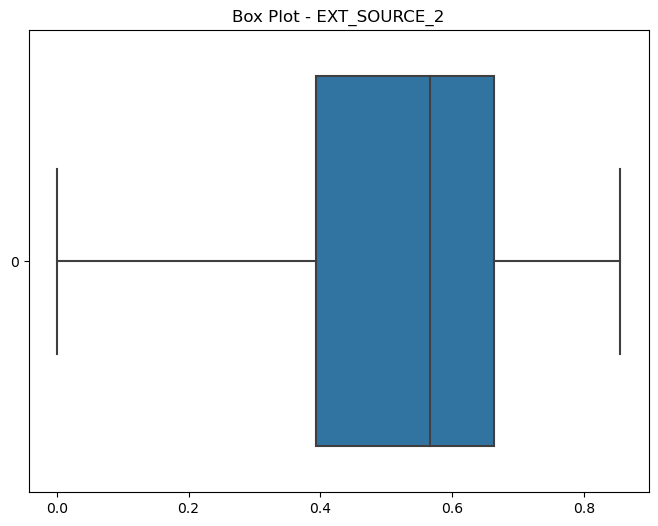

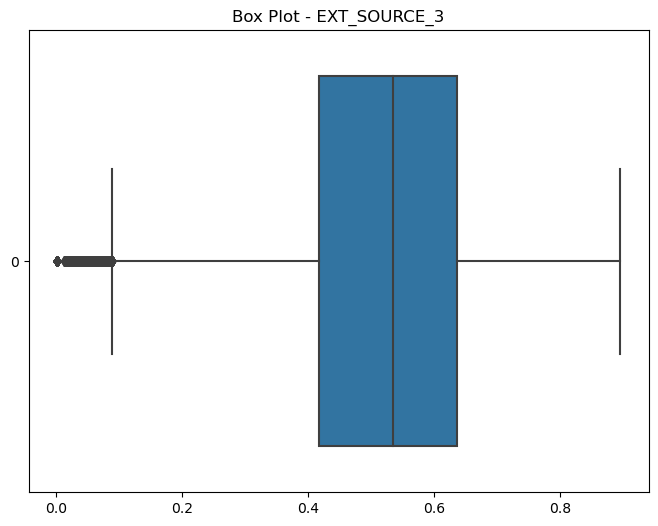

In [36]:


# Specify the columns containing numerical data
numerical_columns = ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE',
                     'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
                     'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
                     'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                     'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                     'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                     'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
                     'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                     'EXT_SOURCE_2', 'EXT_SOURCE_3']

# Create box plots for each column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=filtered_app_data[column],orient='h')
    plt.title(f'Box Plot - {column}')
    plt.show()



In [37]:
quantiles = filtered_app_data[['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE',
                               'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
                               'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
                               'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                               'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                               'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                               'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
                               'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                               'EXT_SOURCE_2', 'EXT_SOURCE_3']].quantile([0.5, 0.7, 0.9, 0.95, 0.99])
print(quantiles)


      TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  REGION_POPULATION_RELATIVE  \
0.50     0.0           0.0          147150.0                    0.018850   
0.70     0.0           0.0          180000.0                    0.025164   
0.90     0.0           2.0          270000.0                    0.035792   
0.95     1.0           2.0          337500.0                    0.046220   
0.99     1.0           3.0          472500.0                    0.072508   

      DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0.50     15750.0         2219.0             4504.0           4504.0   
0.70     18885.0         4435.0             6776.0           6776.0   
0.90     22181.0       365243.0             9932.0           9932.0   
0.95     23204.0       365243.0            11416.0          11416.0   
0.99     24419.0       365243.0            13879.0          13879.0   

      FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0.50         1.0             1.0             

After examining the box plots and using the quantile function to analyze the columns, it can be observed that there are no significant breaks or outliers in the data. The values of the mean and median are relatively close for each column, indicating a gradual distribution without any extreme values. Therefore, it can be concluded that the dataset does not exhibit any noticeable outliers or unusual patterns.


# Univariate Analysis

In [38]:
#Univariate analysis -categorical featues
filtered_app_data['CODE_GENDER'].value_counts()



F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [39]:
# Replace 'XNA' with 'F' in the 'CODE_GENDER' column
filtered_app_data['CODE_GENDER'] = filtered_app_data['CODE_GENDER'].replace('XNA', 'F')

since we are unaware about the XNA so we are replacing it with F- Female candidates as they are the largest.

In [40]:
filtered_app_data['CODE_GENDER'].value_counts()


F    202452
M    105059
Name: CODE_GENDER, dtype: int64

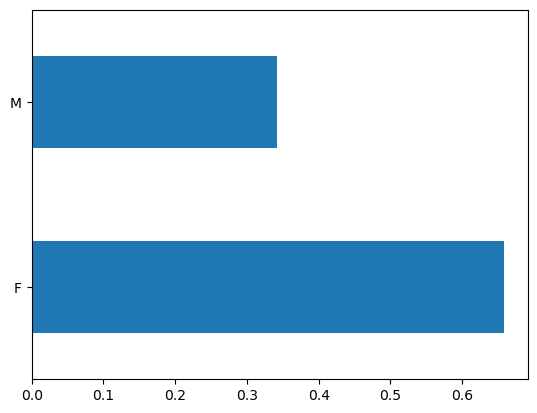

In [41]:
filtered_app_data['CODE_GENDER'].value_counts(normalize=True).plot.barh()
plt.show()

In [42]:
filtered_app_data['ORGANIZATION_TYPE'].value_counts()


Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [43]:

filtered_app_data = filtered_app_data[filtered_app_data['ORGANIZATION_TYPE'] != 'XNA']


In [44]:
filtered_app_data['ORGANIZATION_TYPE'] = filtered_app_data['ORGANIZATION_TYPE'].replace( 'Business Entity Type 3')


In [45]:
filtered_app_data['ORGANIZATION_TYPE'].value_counts()


Self-employed             52643
Other                     22729
Medicine                  15490
Business Entity Type 2    14454
Government                14347
School                    12190
Trade: type 7             10719
Kindergarten               9485
Construction               9201
Business Entity Type 1     8173
Transport: type 4          7367
Trade: type 3              4834
Industry: type 3           4491
Security                   4472
Industry: type 9           4438
Housing                    4043
Industry: type 11          3720
Military                   3551
Bank                       3448
Agriculture                3354
Police                     3141
Transport: type 2          3042
Postal                     2931
Security Ministries        2757
Trade: type 2              2661
Restaurant                 2481
Services                   2169
University                 1838
Industry: type 7           1762
Transport: type 3          1616
Industry: type 1           1387
Hotel   

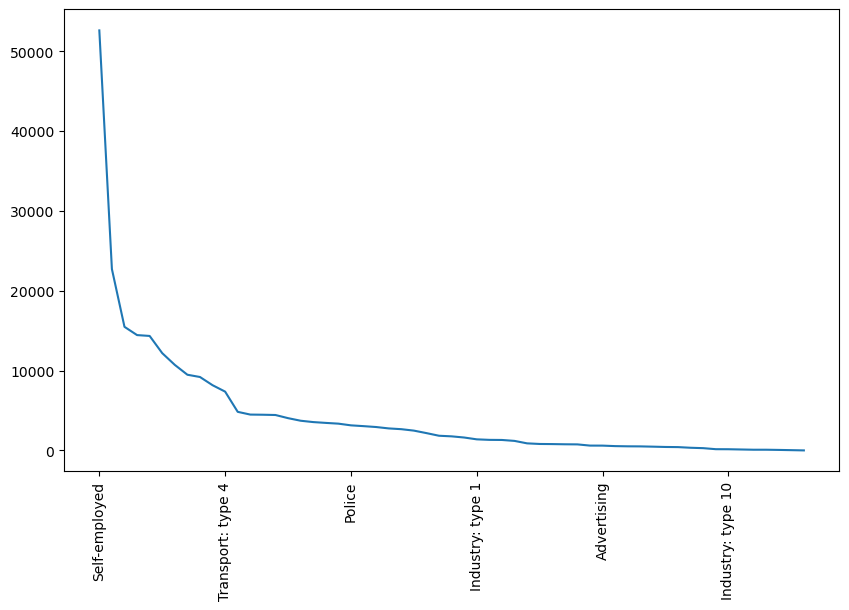

In [46]:
plt.figure(figsize=(10, 6))
counts = filtered_app_data['ORGANIZATION_TYPE'].value_counts()
line_plot = counts.plot.line(rot=90)
plt.show()


In [47]:
filtered_app_data['FLAG_OWN_CAR'].head()


0    N
1    N
2    Y
3    N
4    N
Name: FLAG_OWN_CAR, dtype: object

In [48]:
# Categorical variables
categorical_vars = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
                    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                    'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

In [49]:
# Numerical variables
numerical_vars = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_POPULATION_RELATIVE',
                  'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                  'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                  'EXT_SOURCE_2', 'EXT_SOURCE_3']

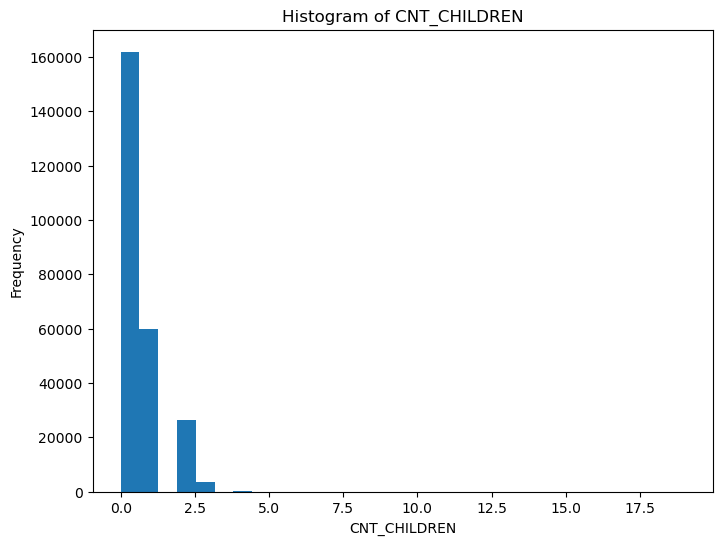

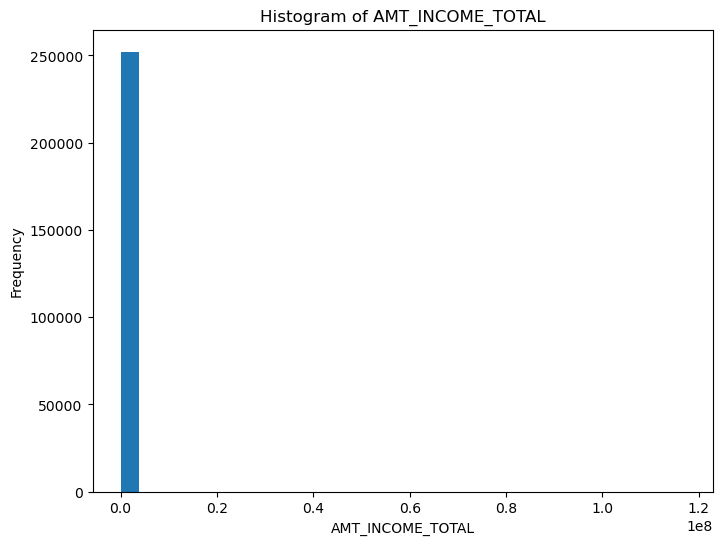

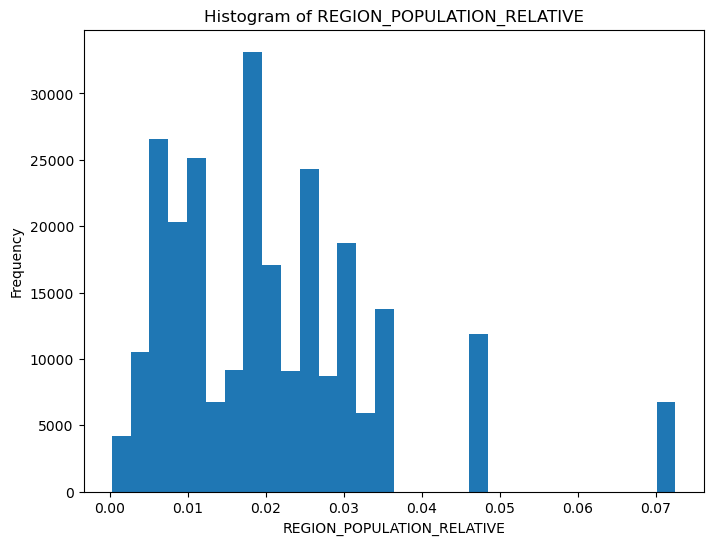

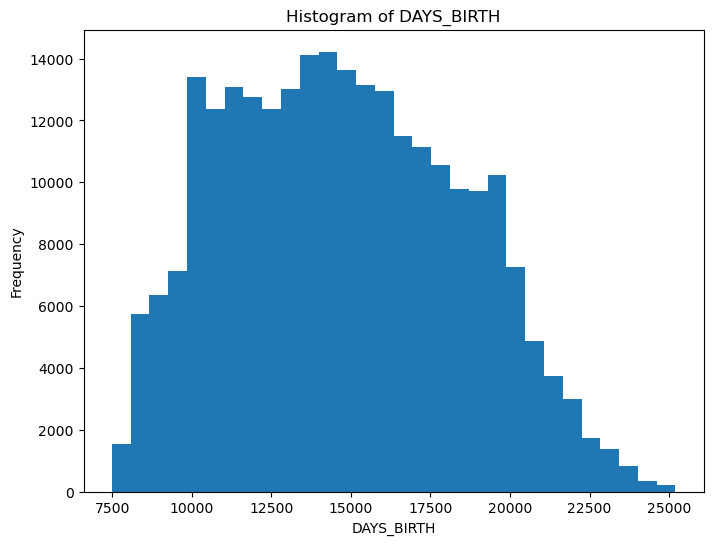

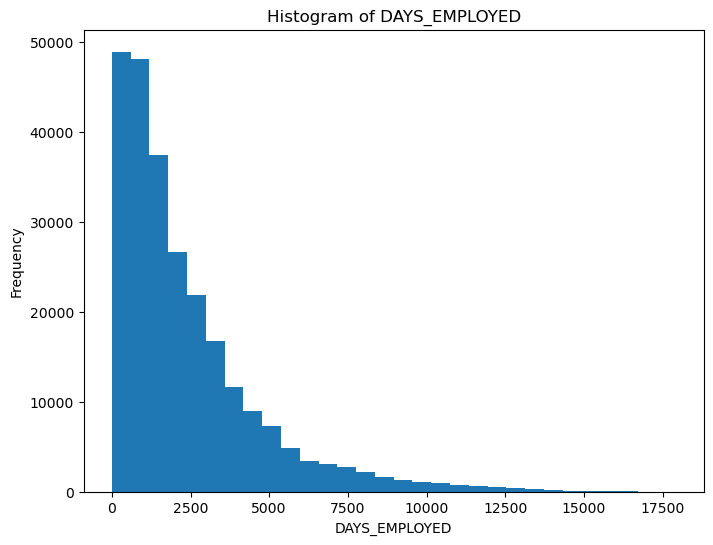

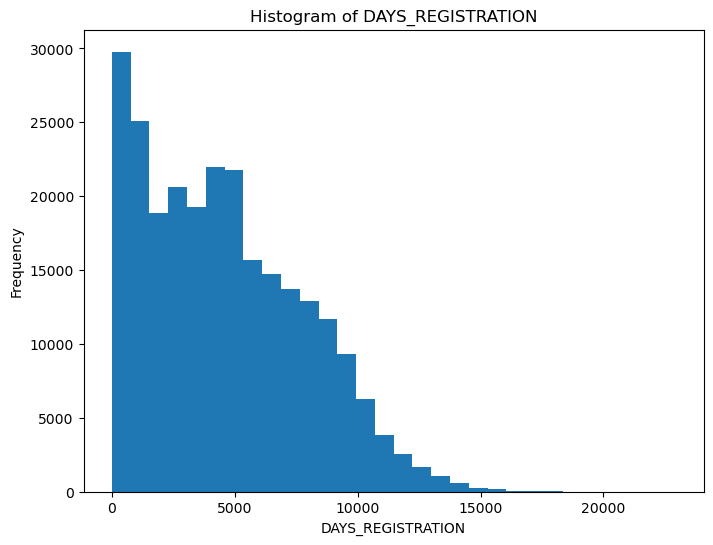

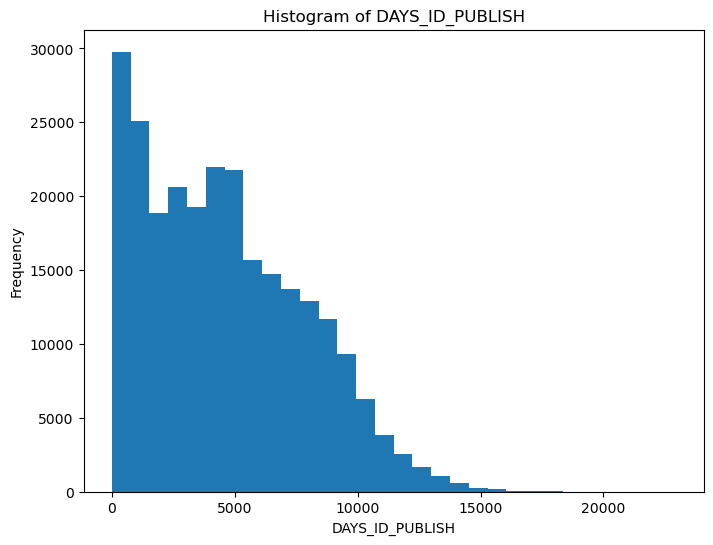

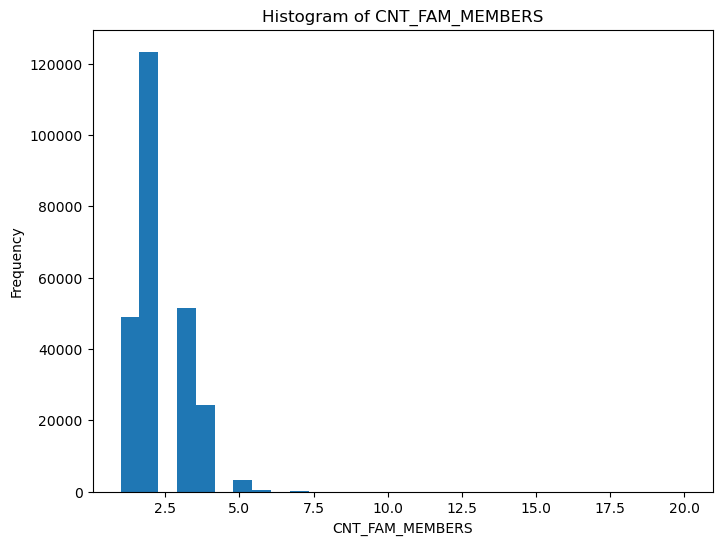

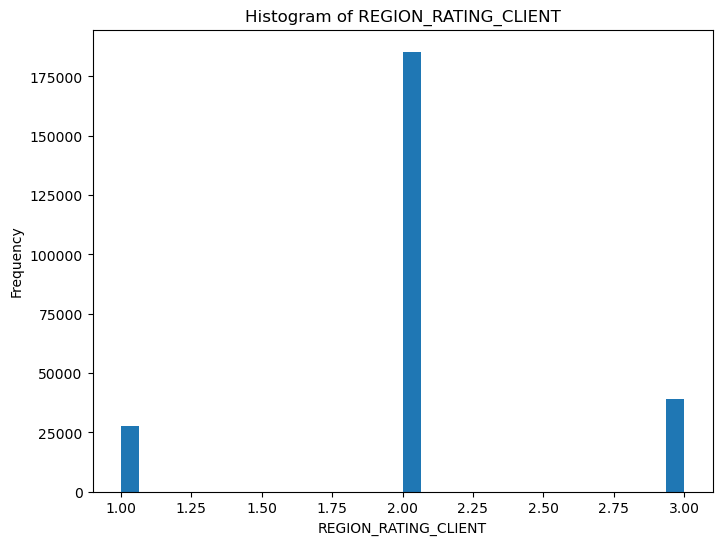

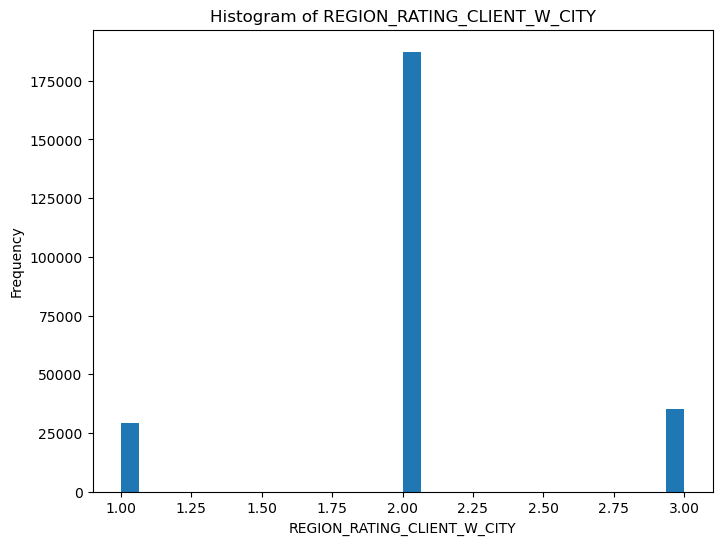

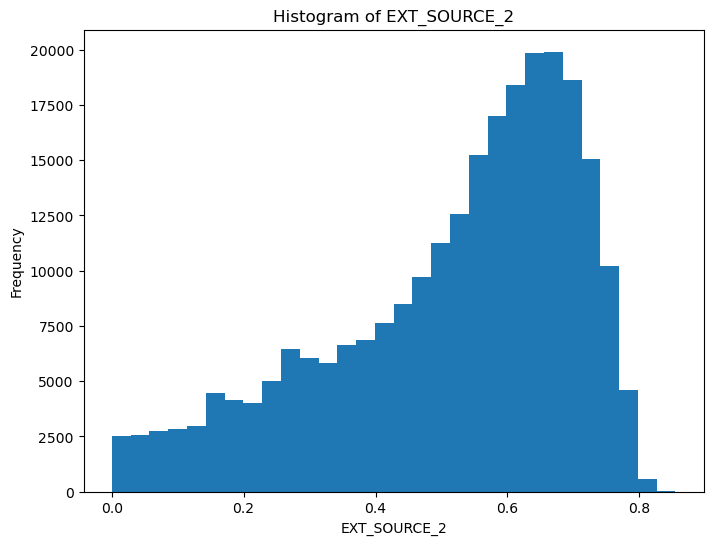

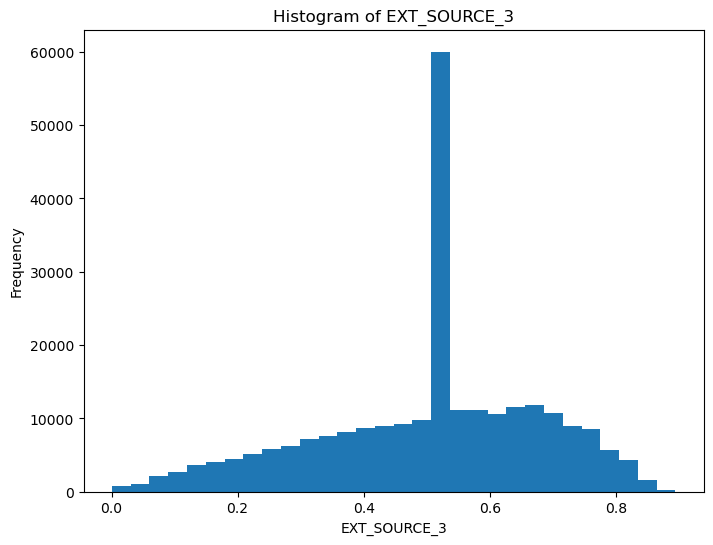

In [50]:
# Plotting histograms for numerical variables
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    plt.hist(filtered_app_data[var], bins=30)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

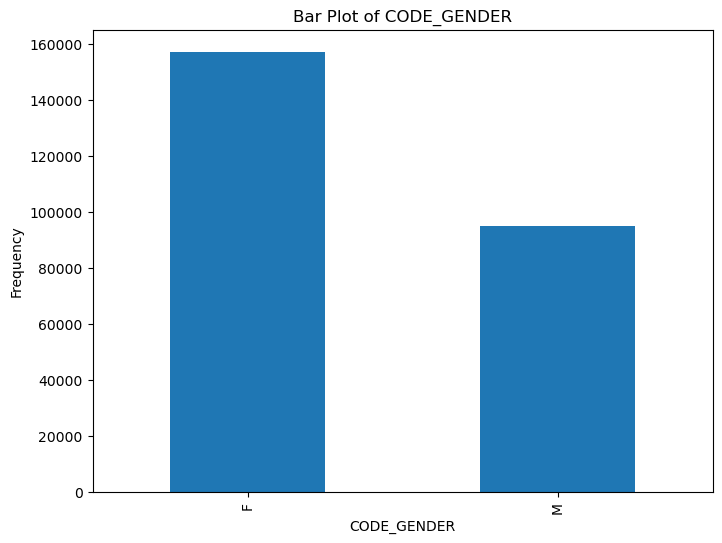

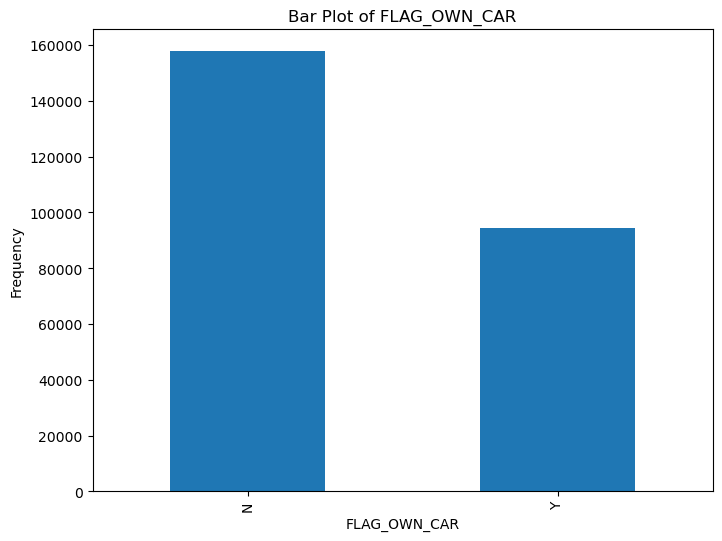

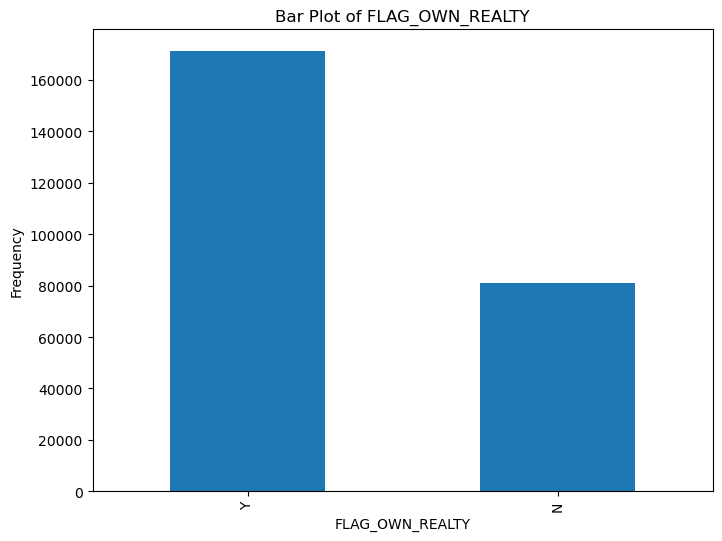

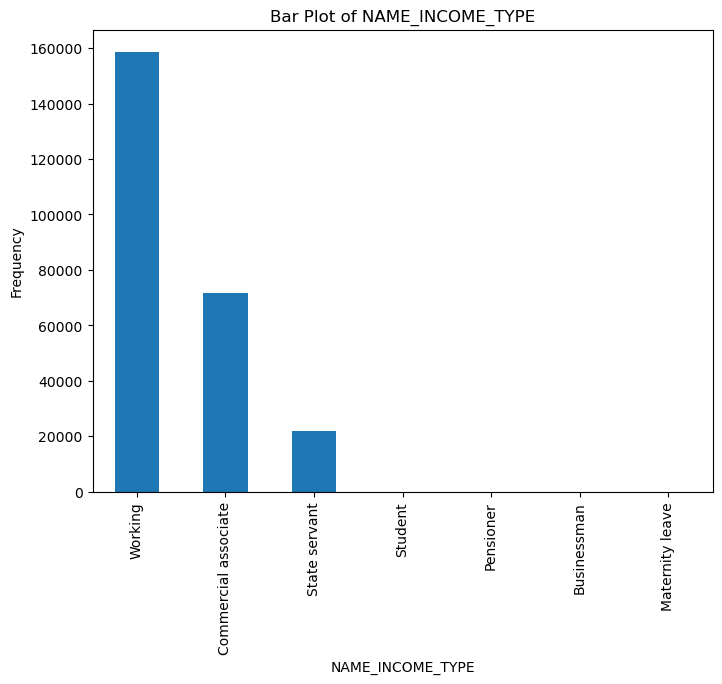

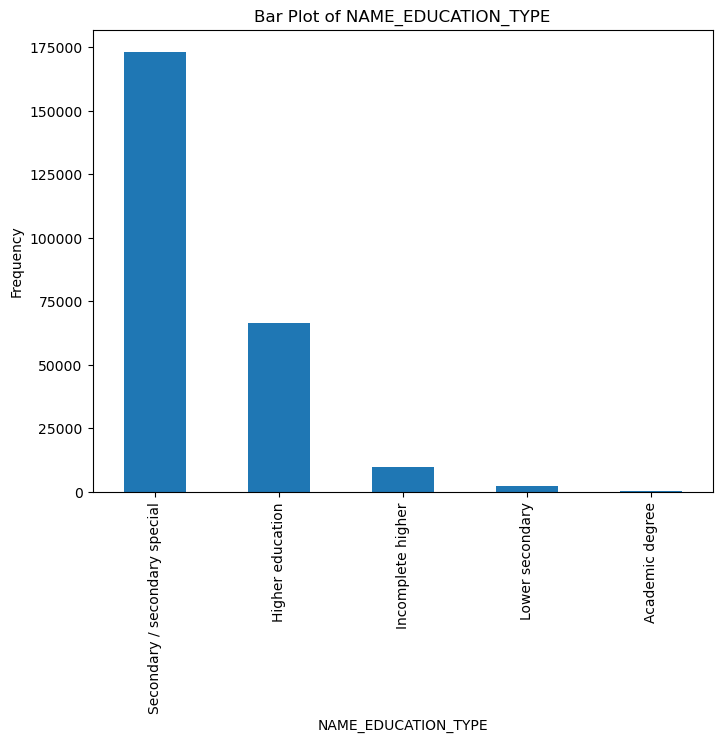

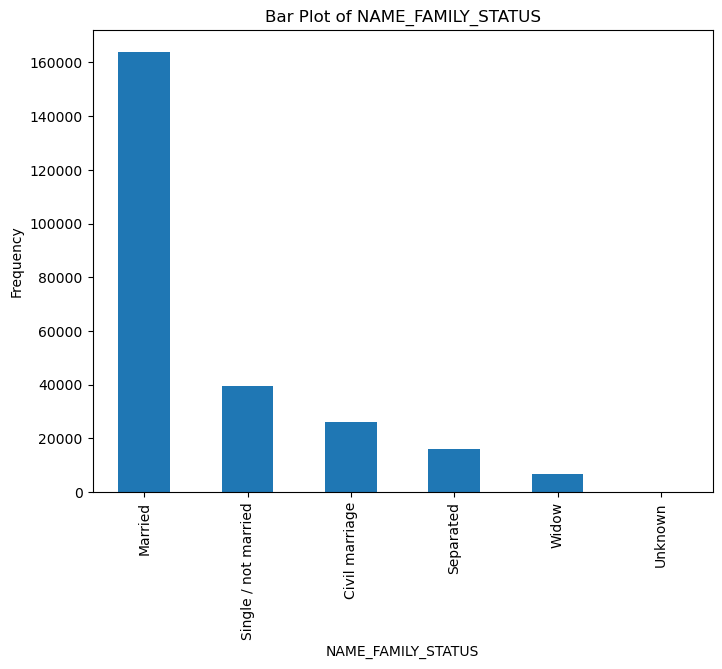

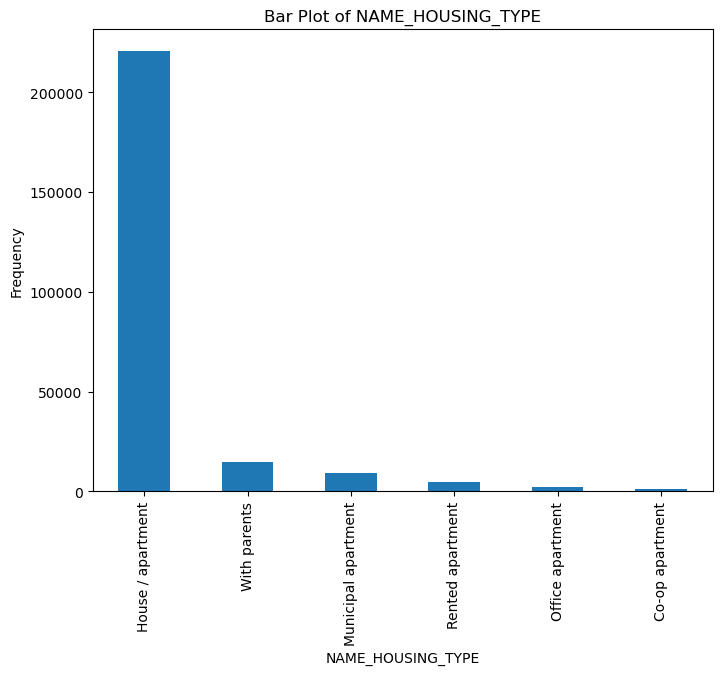

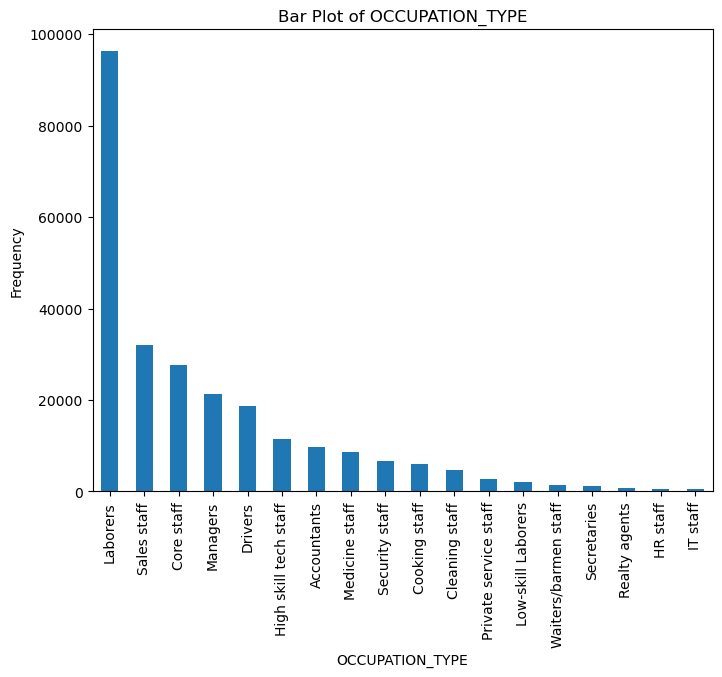

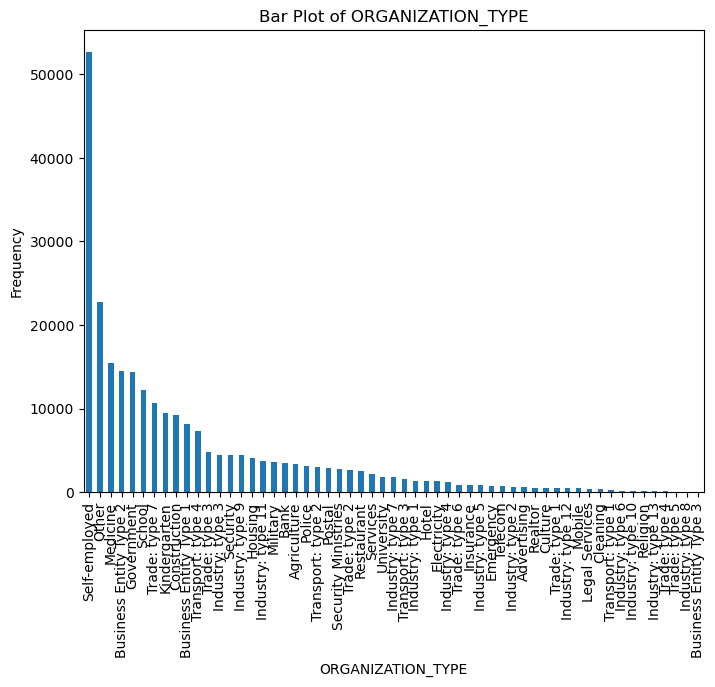

In [51]:
# Plotting bar plots for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    filtered_app_data[var].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Segmented Univariate Analysis:


In [52]:
# Segmenting the dataset based on the target variable
difficulties_segment = filtered_app_data[filtered_app_data['TARGET'] == 1]
no_difficulties_segment = filtered_app_data[filtered_app_data['TARGET'] == 0]


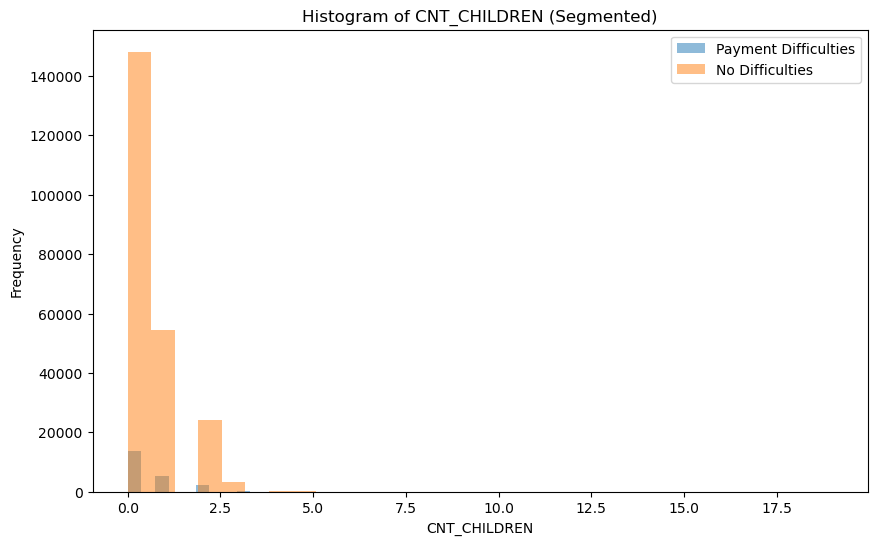

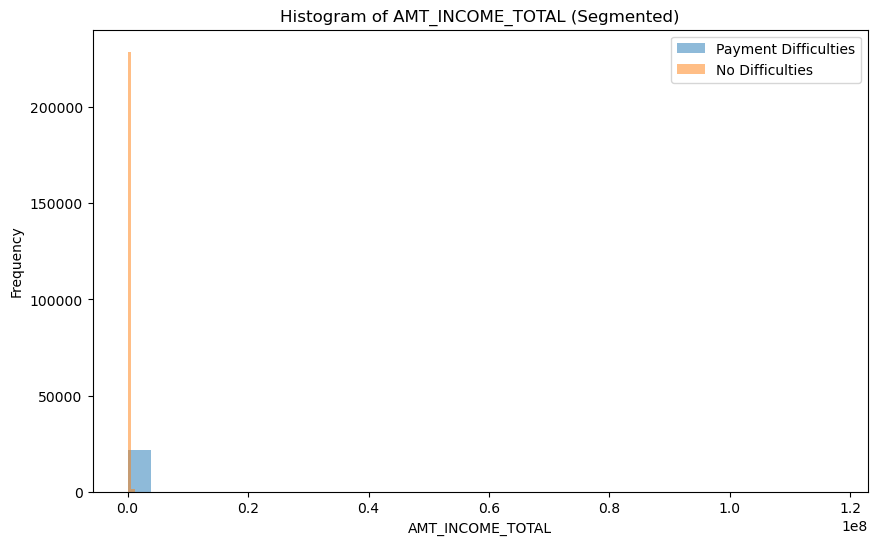

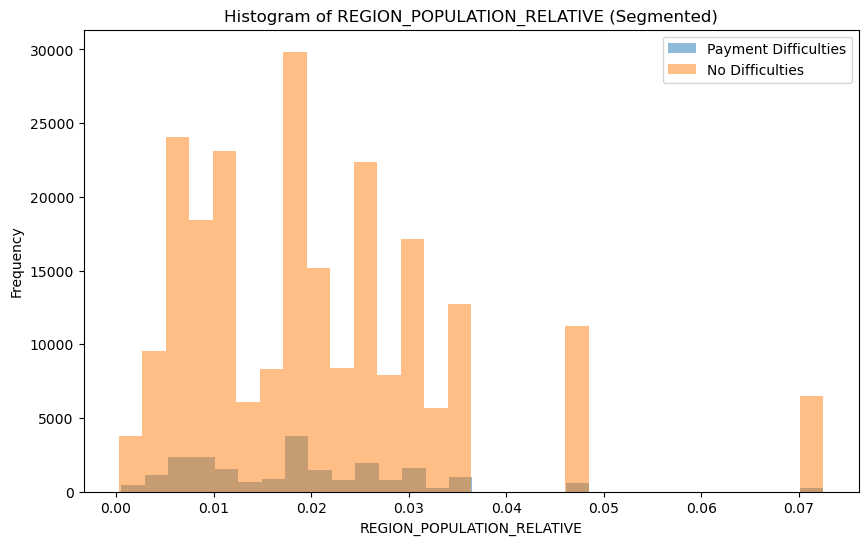

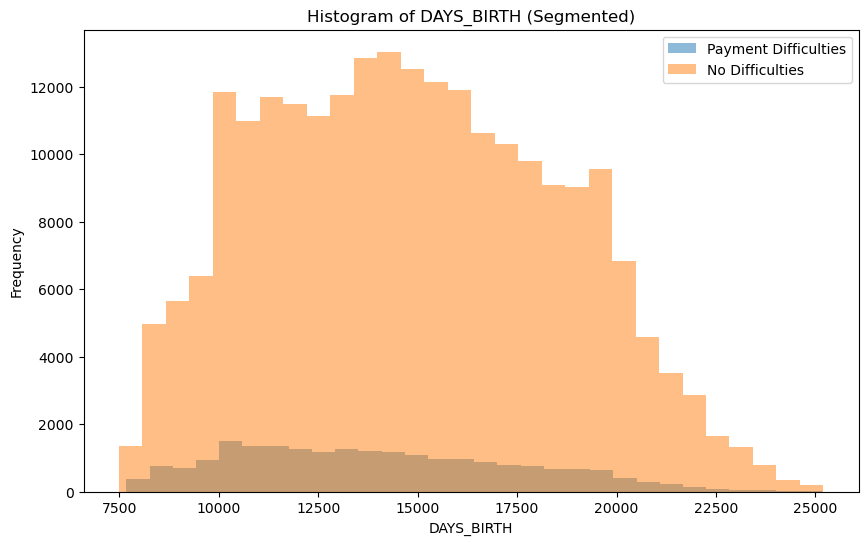

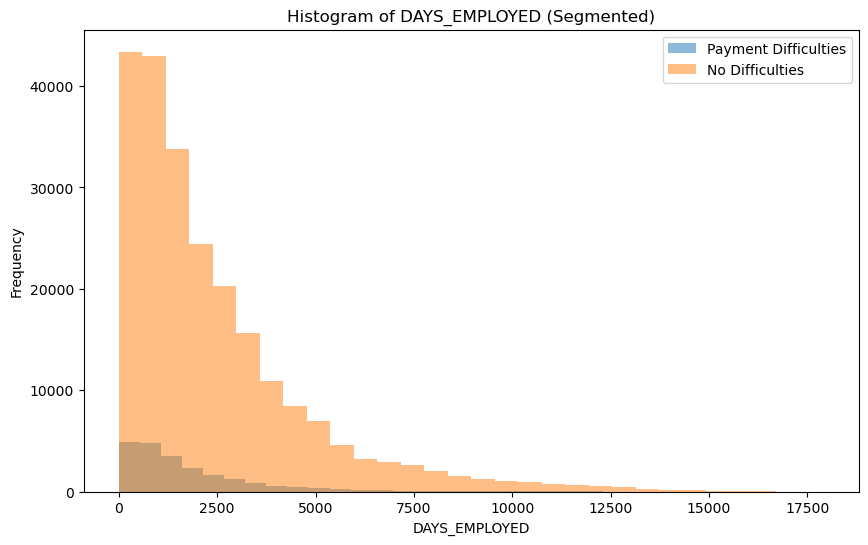

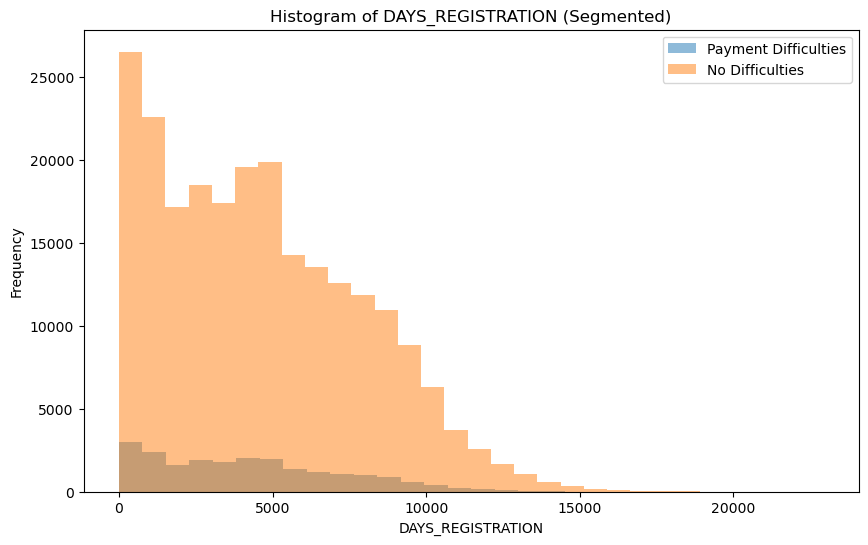

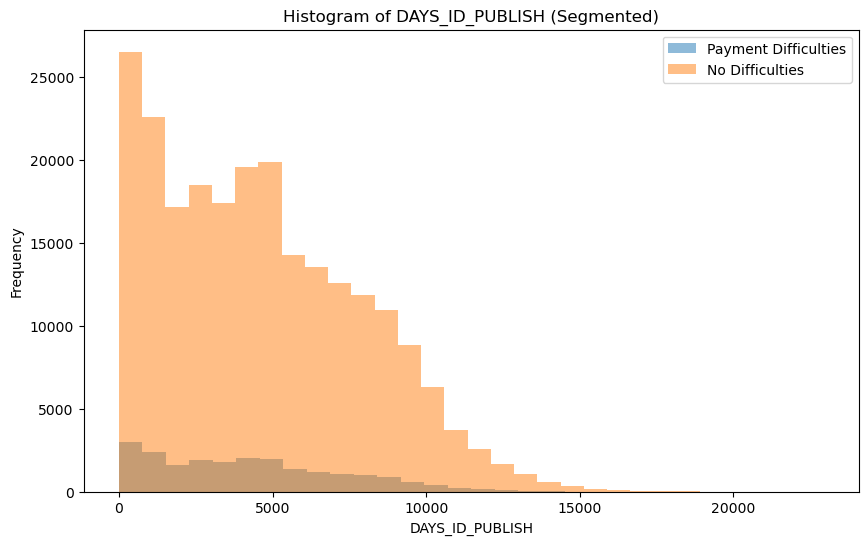

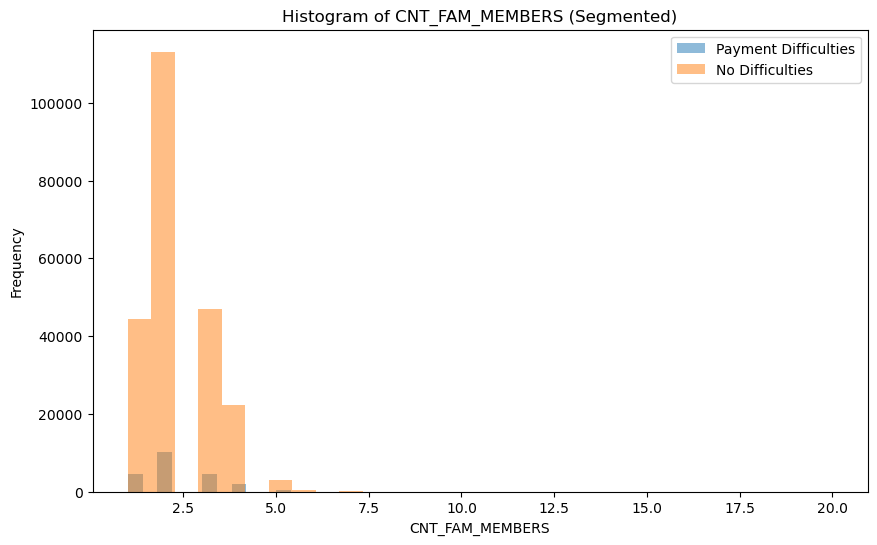

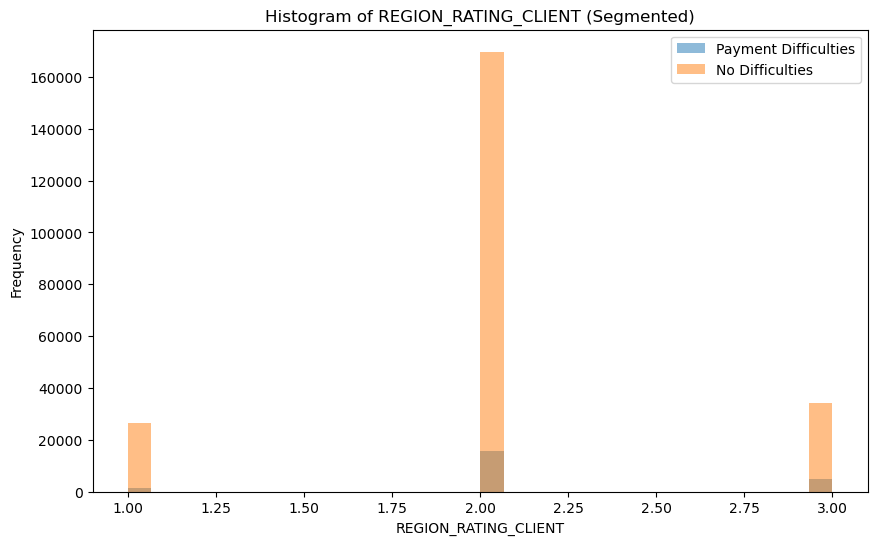

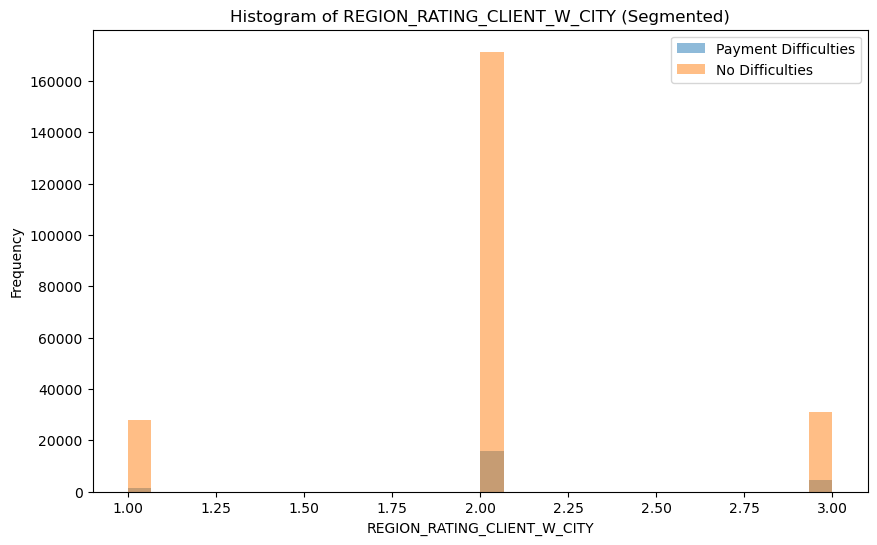

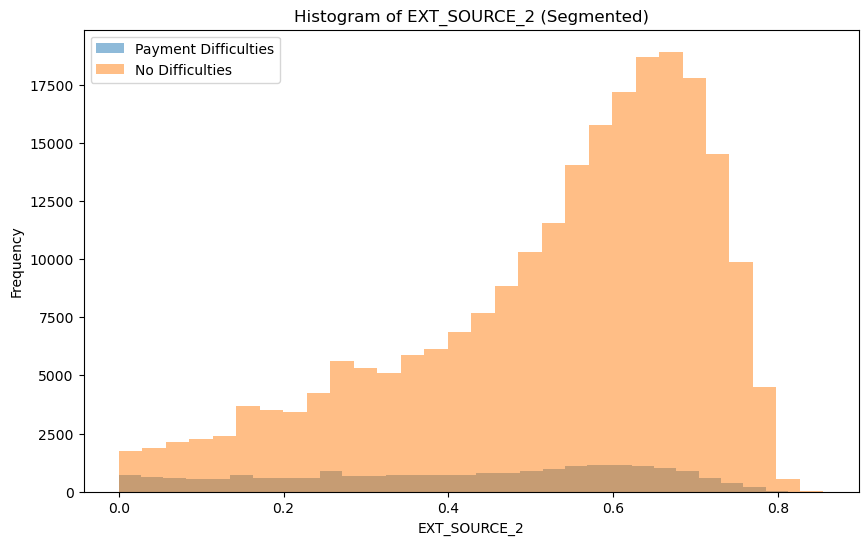

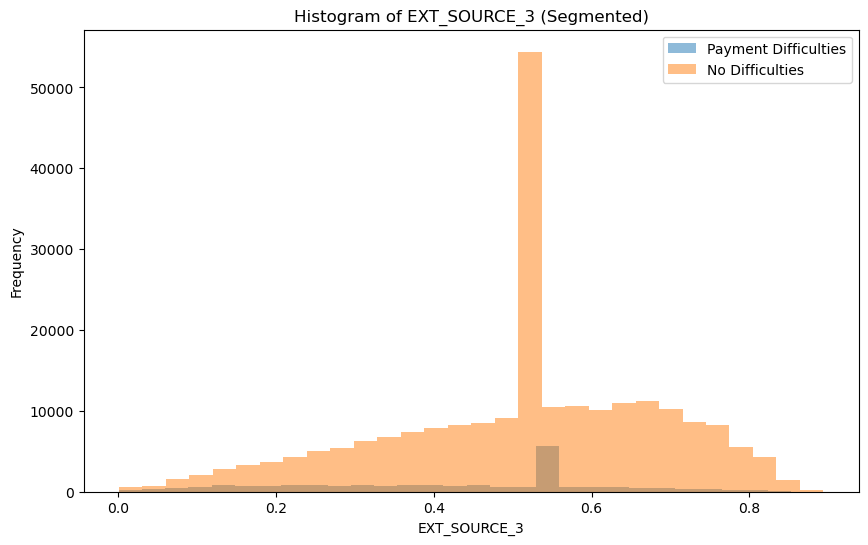

In [53]:

# Plotting segmented histograms for numerical variables
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    plt.hist(difficulties_segment[var], bins=30, alpha=0.5, label='Payment Difficulties')
    plt.hist(no_difficulties_segment[var], bins=30, alpha=0.5, label='No Difficulties')
    plt.title(f'Histogram of {var} (Segmented)')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [54]:
# Segmenting the dataset based on the target variable
difficulties_segment = filtered_app_data[filtered_app_data['TARGET'] == 1]
no_difficulties_segment = filtered_app_data[filtered_app_data['TARGET'] == 0]

# Iterate over each category and perform analysis
for category in categorical_vars:
    # Calculate the value counts for each category in the payment difficulties segment
    difficulties_counts = difficulties_segment[category].value_counts(normalize=True)

    # Calculate the value counts for each category in the no difficulties segment
    no_difficulties_counts = no_difficulties_segment[category].value_counts(normalize=True)

    # Print the analysis for each category
    print(f"Category: {category}")
    print("Payment Difficulties:")
    print(difficulties_counts)
    print("No Difficulties:")
    print(no_difficulties_counts)
    print("")


Category: CODE_GENDER
Payment Difficulties:
F    0.545958
M    0.454042
Name: CODE_GENDER, dtype: float64
No Difficulties:
F    0.630737
M    0.369263
Name: CODE_GENDER, dtype: float64

Category: FLAG_OWN_CAR
Payment Difficulties:
N    0.675658
Y    0.324342
Name: FLAG_OWN_CAR, dtype: float64
No Difficulties:
N    0.620776
Y    0.379224
Name: FLAG_OWN_CAR, dtype: float64

Category: FLAG_OWN_REALTY
Payment Difficulties:
Y    0.674376
N    0.325624
Name: FLAG_OWN_REALTY, dtype: float64
No Difficulties:
Y    0.678922
N    0.321078
Name: FLAG_OWN_REALTY, dtype: float64

Category: NAME_INCOME_TYPE
Payment Difficulties:
Working                 0.697229
Commercial associate    0.245477
State servant           0.057202
Maternity leave         0.000092
Name: NAME_INCOME_TYPE, dtype: float64
No Difficulties:
Working                 0.623312
Commercial associate    0.287696
State servant           0.088814
Student                 0.000078
Pensioner               0.000043
Businessman             0

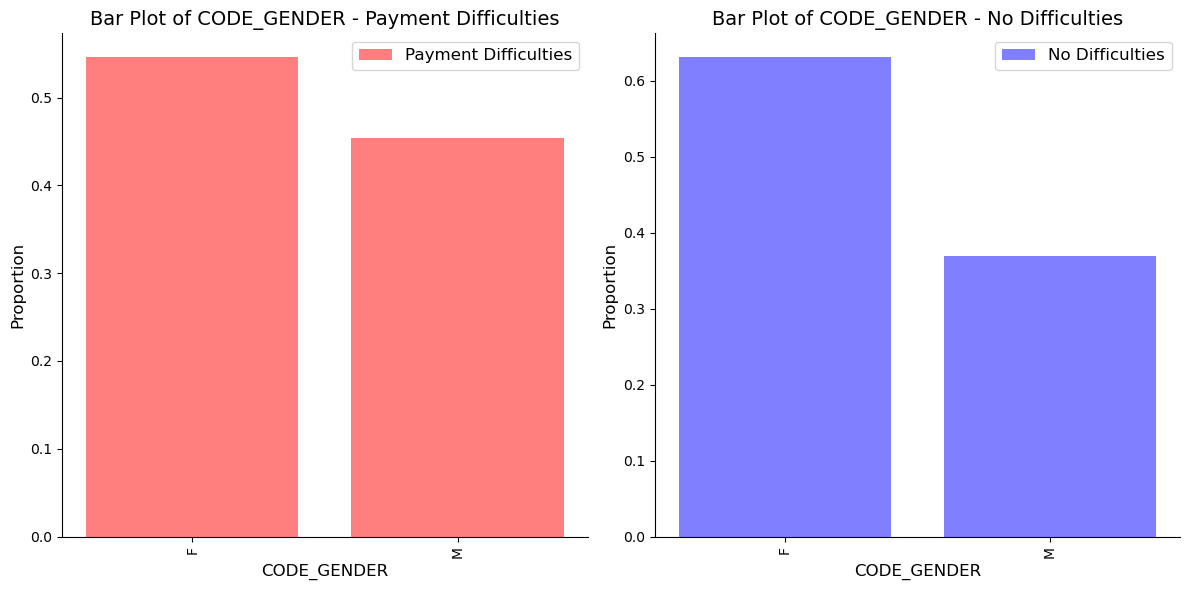

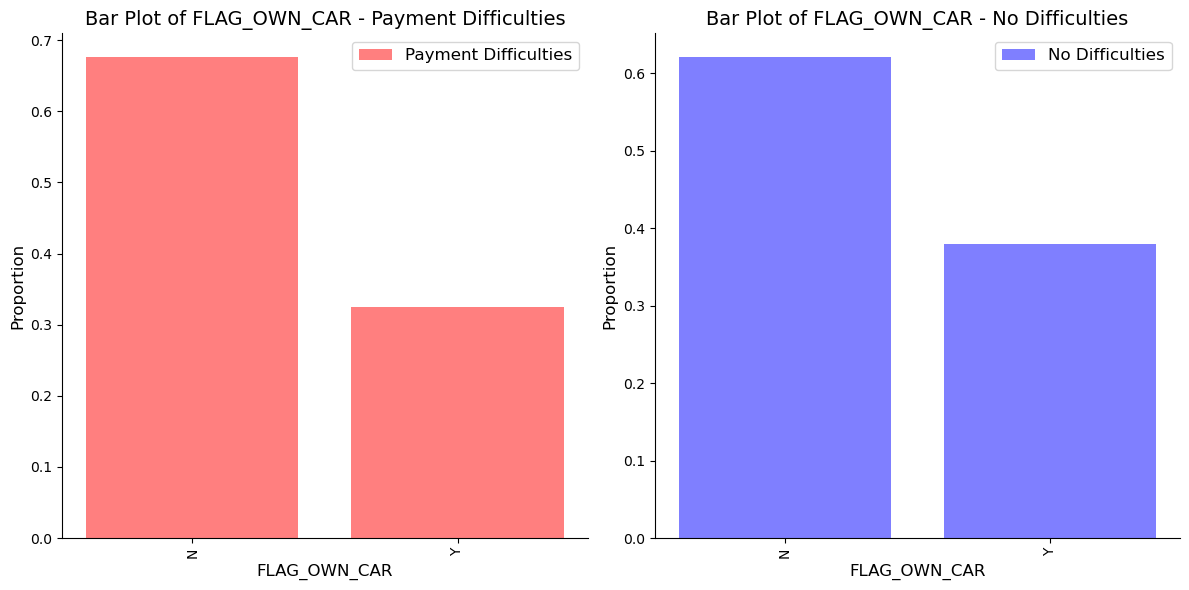

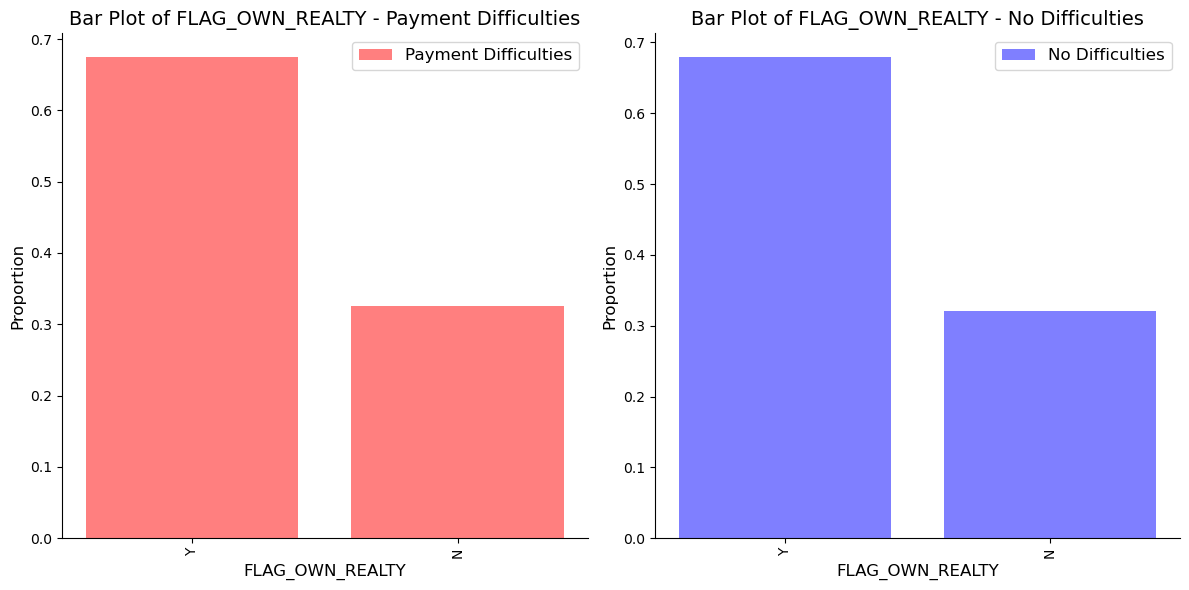

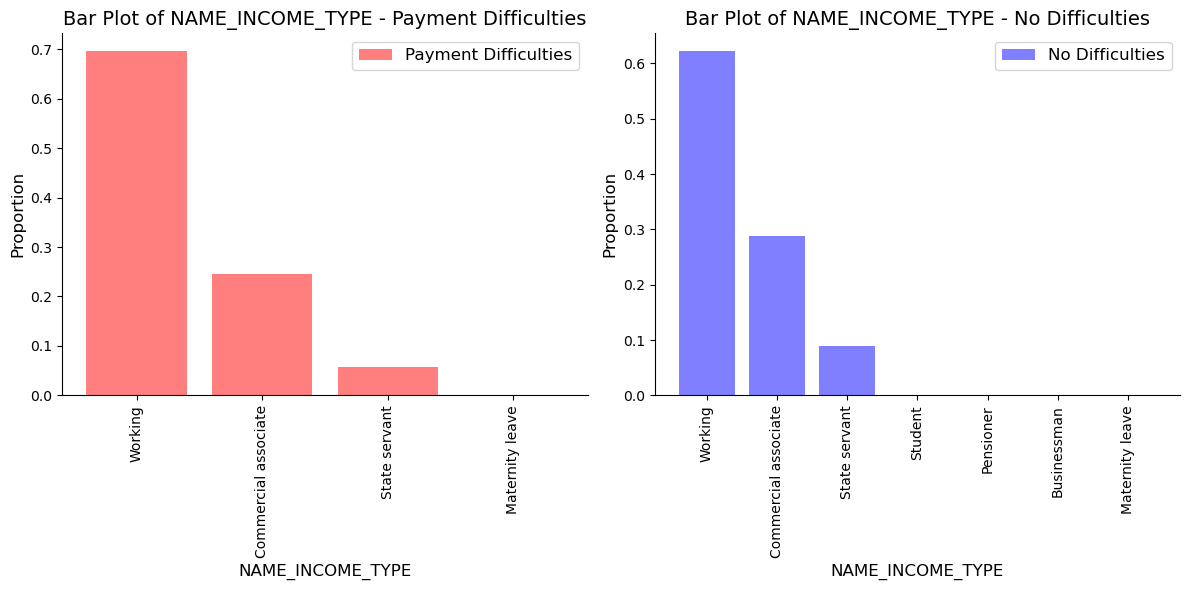

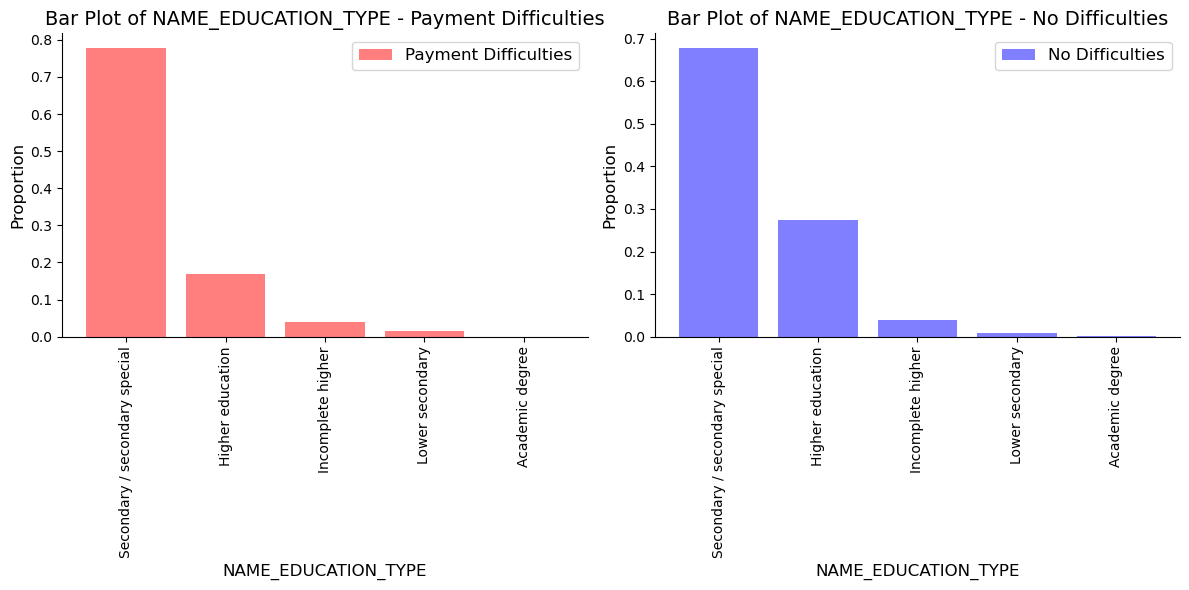

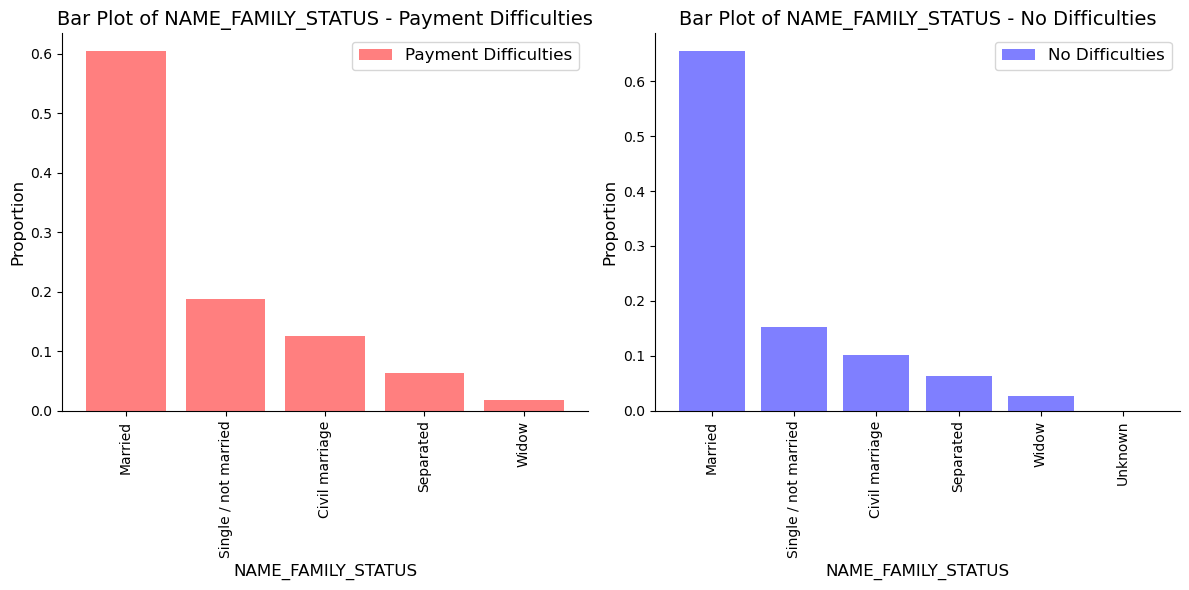

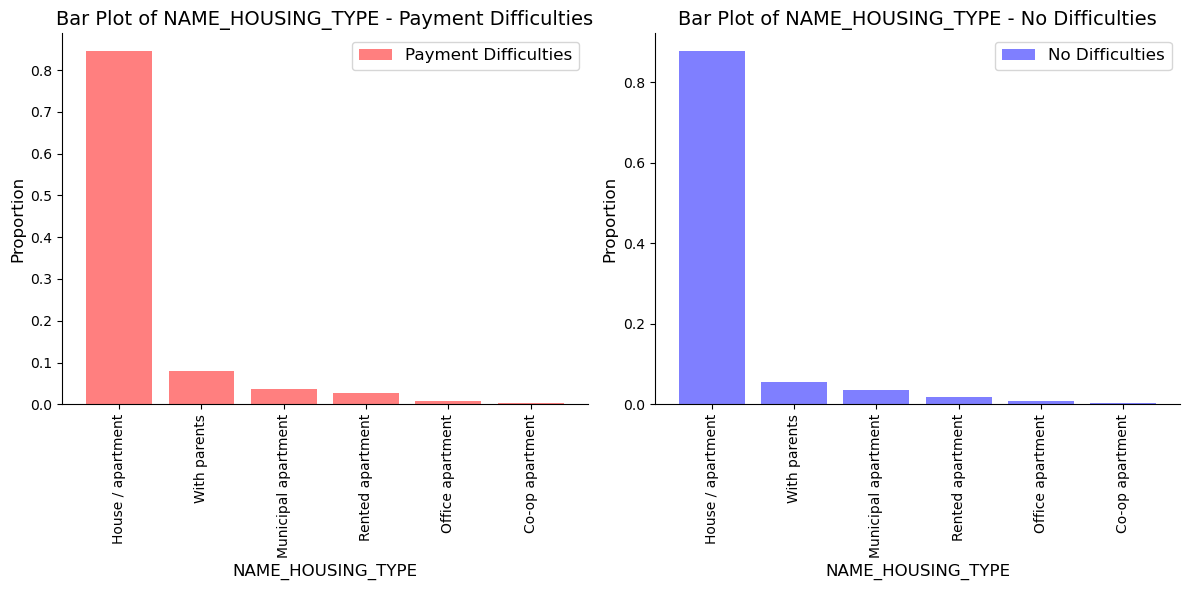

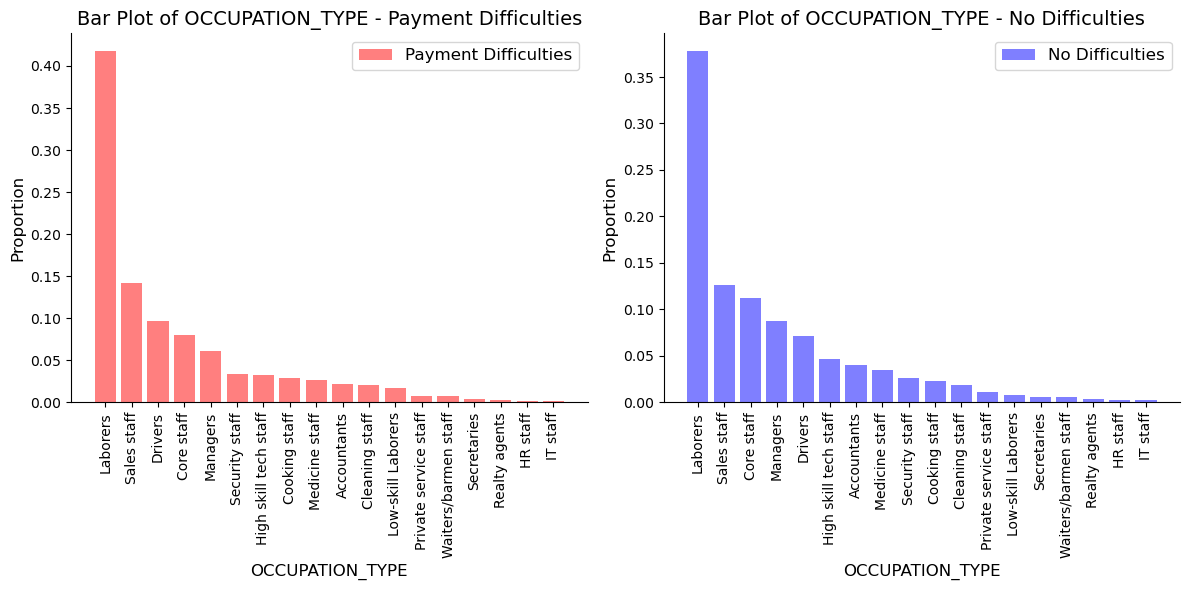

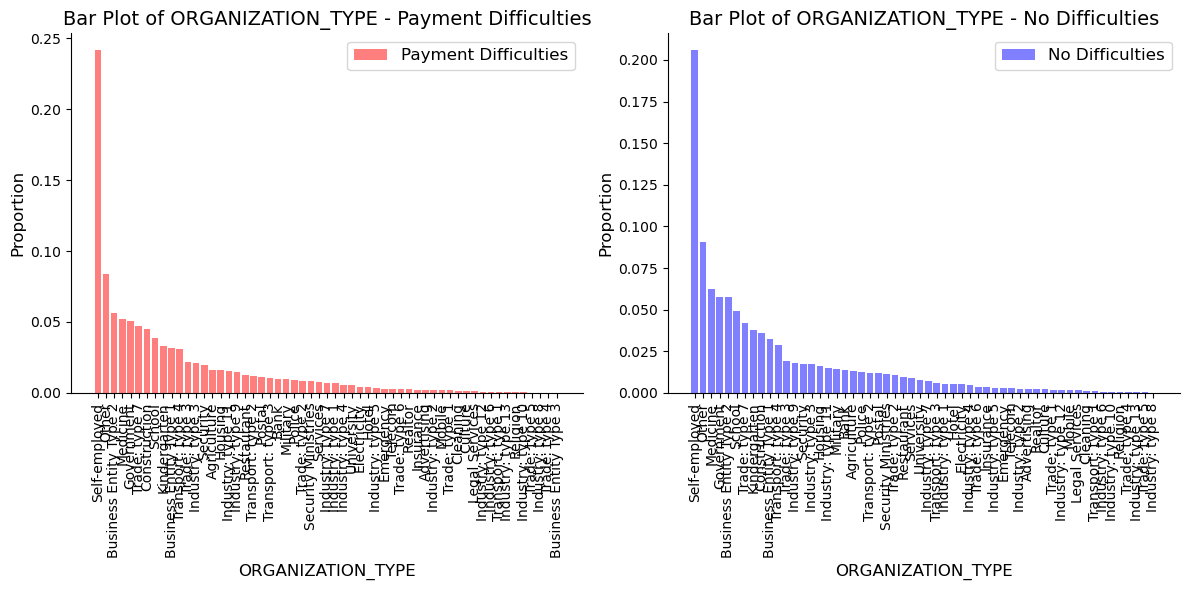

In [55]:
# Plotting segmented bar plots for categorical variables

# Segmenting the dataset based on the target variable
difficulties_segment = filtered_app_data[filtered_app_data['TARGET'] == 1]
no_difficulties_segment = filtered_app_data[filtered_app_data['TARGET'] == 0]

# Iterating over each category and perform analysis
for category in categorical_vars:
    # Calculate the value counts for each category in the payment difficulties segment
    difficulties_counts = difficulties_segment[category].value_counts(normalize=True)

    # Calculate the value counts for each category in the no difficulties segment
    no_difficulties_counts = no_difficulties_segment[category].value_counts(normalize=True)

    # Creating a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Bar plot for payment difficulties segment
    ax1.bar(difficulties_counts.index, difficulties_counts.values, alpha=0.5, label='Payment Difficulties', color='red')
    ax1.set_title(f'Bar Plot of {category} - Payment Difficulties', fontsize=14)
    ax1.set_xlabel(category, fontsize=12)
    ax1.set_ylabel('Proportion', fontsize=12)
    ax1.legend(fontsize=12)
    ax1.set_xticklabels(difficulties_counts.index, rotation=90)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Bar plot for no difficulties segment
    ax2.bar(no_difficulties_counts.index, no_difficulties_counts.values, alpha=0.5, label='No Difficulties', color='blue')
    ax2.set_title(f'Bar Plot of {category} - No Difficulties', fontsize=14)
    ax2.set_xlabel(category, fontsize=12)
    ax2.set_ylabel('Proportion', fontsize=12)
    ax2.legend(fontsize=12)
    ax2.set_xticklabels(no_difficulties_counts.index, rotation=90)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    # Adjust spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()


Observations:
    
*Gender (CODE_GENDER):The proportion of clients with payment difficulties is higher among males (42.7%) compared to females (57.3%).
Females have a higher proportion (65.4%) of paying the loan on time compared to males (34.6%)

*Car Ownership (FLAG_OWN_CAR):
Clients who do not own a car have a higher proportion (63.2%) of paying the loan on time compared to car owners (36.8%).


*Real Estate Ownership (FLAG_OWN_REALTY):
The difference in proportions is minimal between clients who own real estate (68.2%) and those who do not (67.6%) in terms of paying the loan on time.

*Income Type (NAME_INCOME_TYPE):
Among different income types, individuals in the "State servant" category have a higher proportion (11.8%) of paying the loan on time.


*Education Level (NAME_EDUCATION_TYPE):
Individuals with a "Higher education" have a higher proportion (27%) of paying the loan on time compared to other education levels.

*Family Status (NAME_FAMILY_STATUS):
Among different family statuses, individuals who are "Single / not married" have a higher proportion (14.7%) of paying the loan on time.

*Housing Type (NAME_HOUSING_TYPE):
The majority of clients who pay the loan on time live in a "House / apartment" (88.0%).

*Occupation Type (OCCUPATION_TYPE):
Among different occupation types, individuals in the "Managers" category have a higher proportion (7.9%) of paying the loan on time.

*Organization Type (ORGANIZATION_TYPE):
Among different organization types, clients who are "Government" employees have a higher proportion (5.7%) of paying the loan on time.

# Bivariate Analysis:


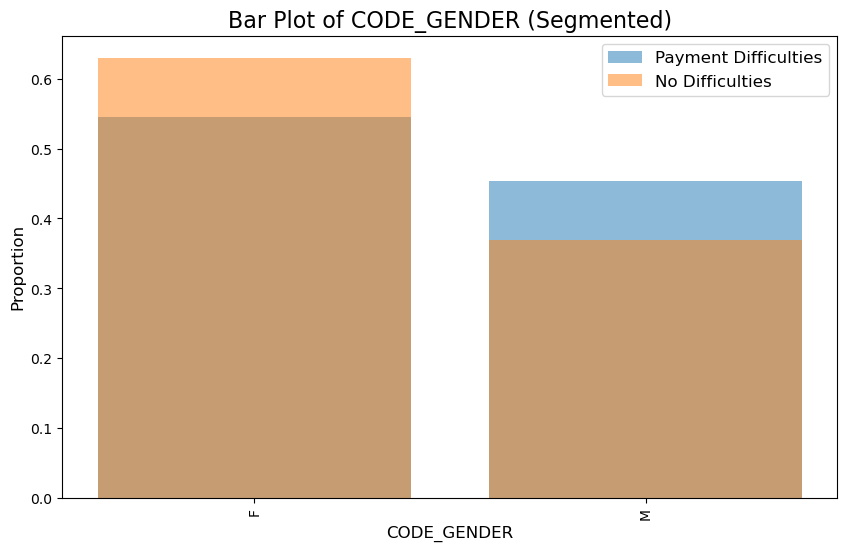

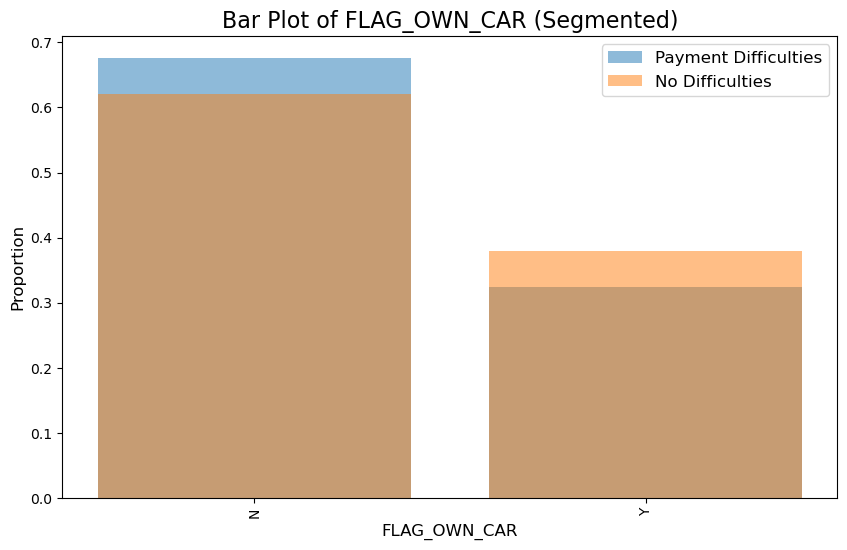

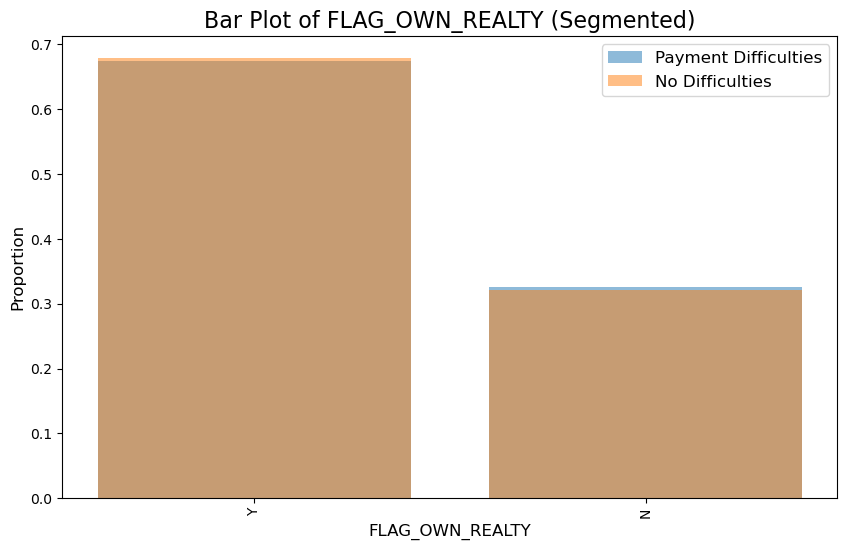

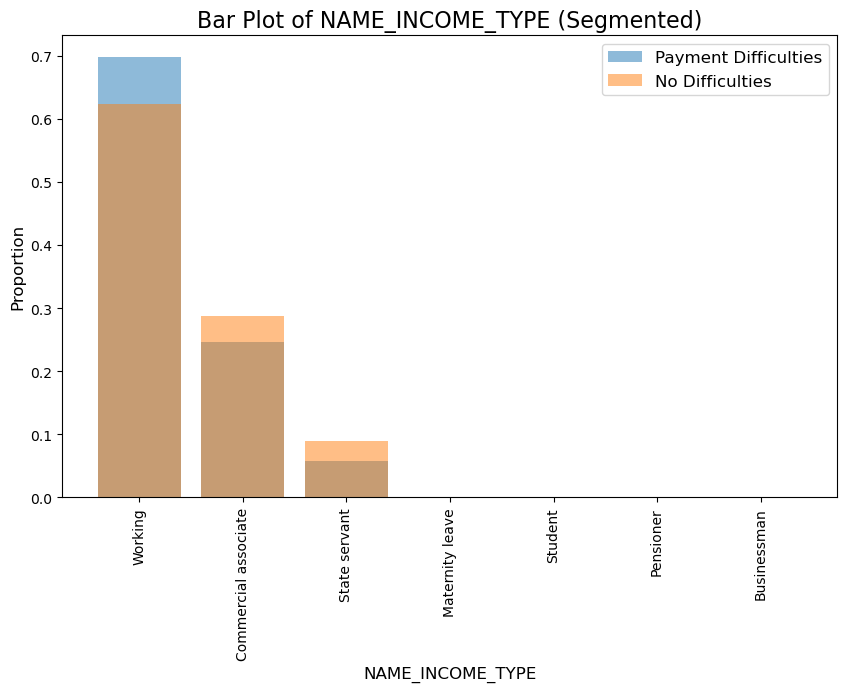

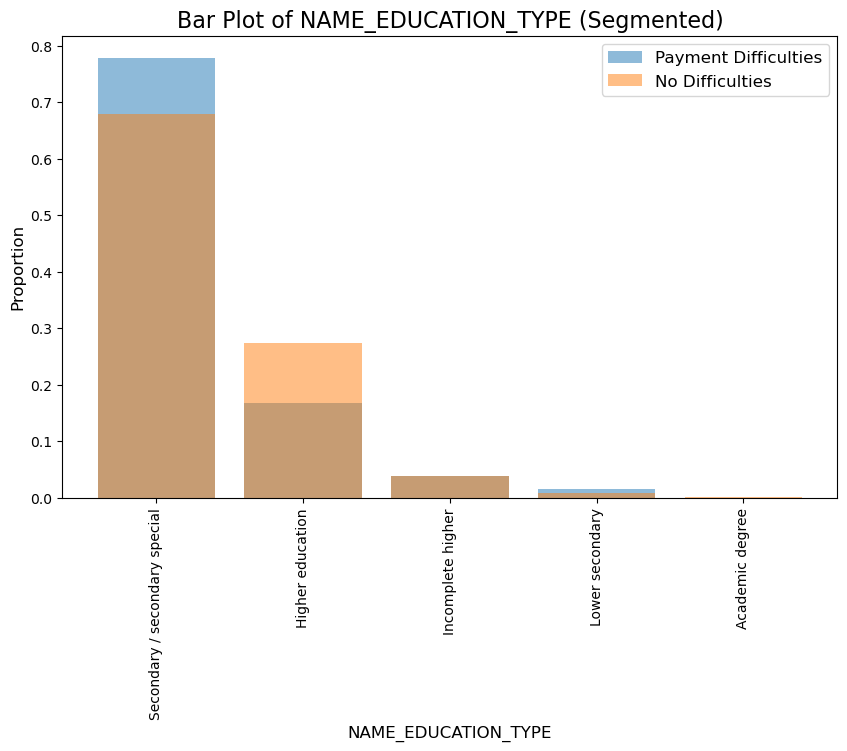

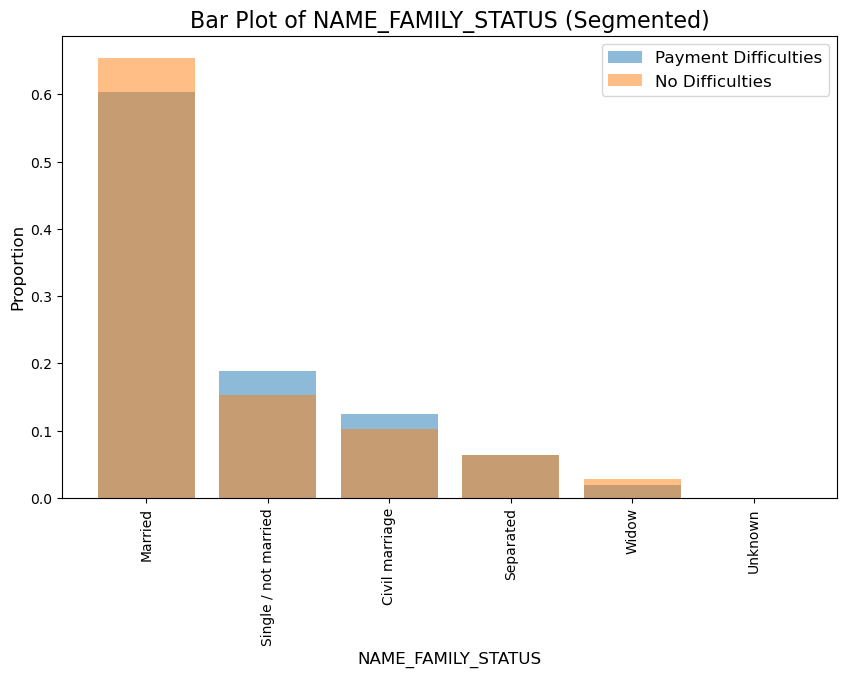

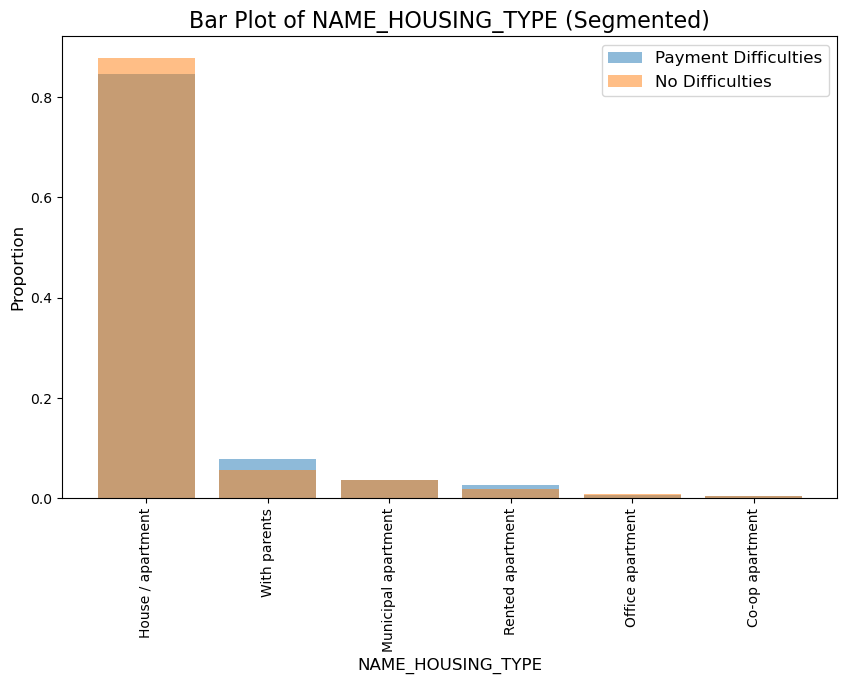

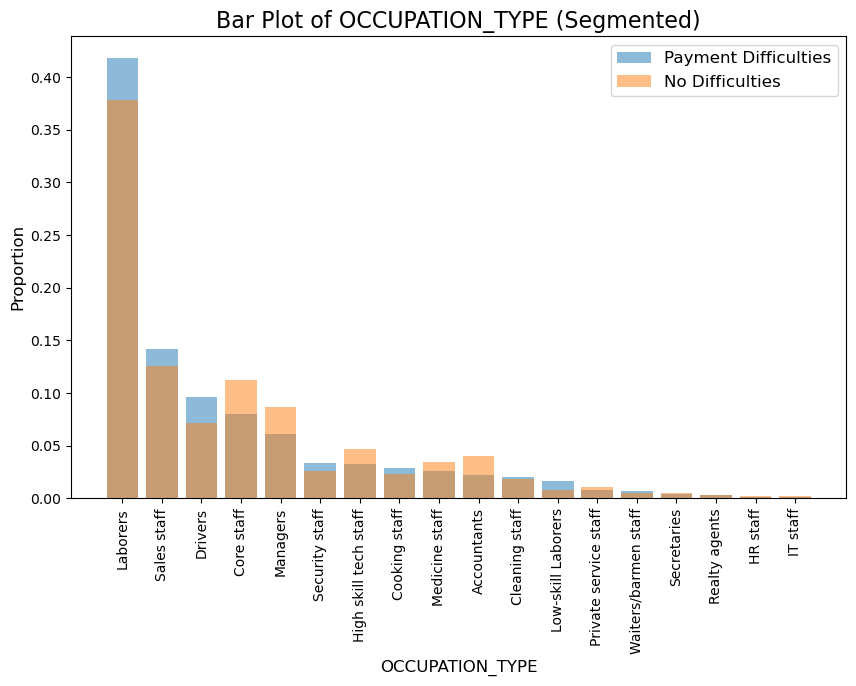

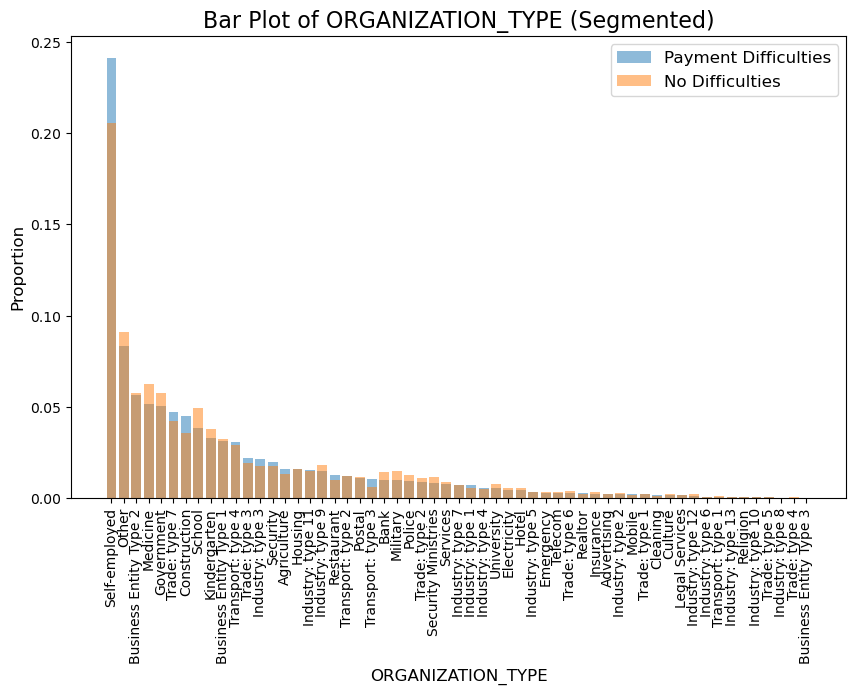

In [56]:
# Plotting bar plot for categorical variables vs. target variable
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    difficulties_counts = difficulties_segment[var].value_counts(normalize=True)
    no_difficulties_counts = no_difficulties_segment[var].value_counts(normalize=True)
    plt.bar(difficulties_counts.index, difficulties_counts.values, alpha=0.5, label='Payment Difficulties')
    plt.bar(no_difficulties_counts.index, no_difficulties_counts.values, alpha=0.5, label='No Difficulties')
    plt.title(f'Bar Plot of {var} (Segmented)', fontsize=16)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Proportion', fontsize=12)
    plt.legend(fontsize=12)
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=10)
    plt.show()


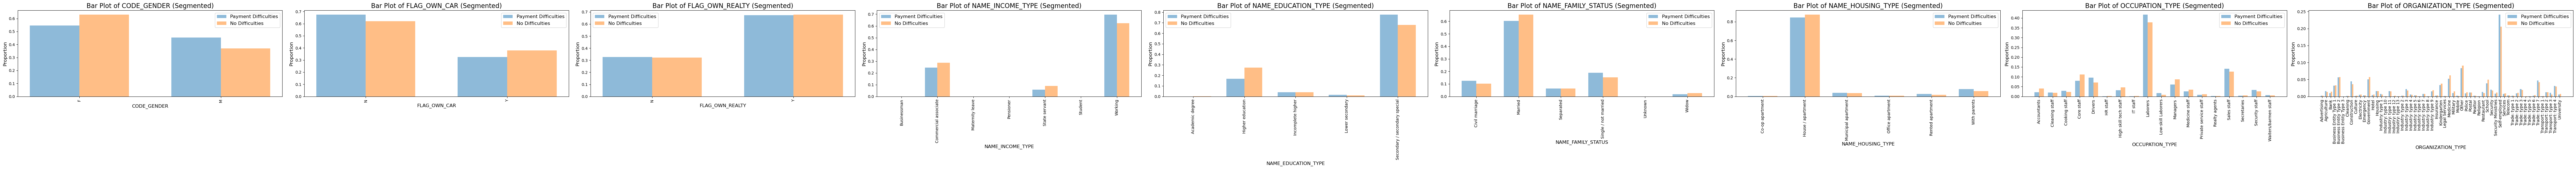

In [57]:

# Set the width of the bars
bar_width = 0.35

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_vars), figsize=(10*len(categorical_vars), 6))

# Iterate over the categorical variables
for i, var in enumerate(categorical_vars):
    # Get the value counts for the target variable for each category in the current variable
    difficulties_counts = difficulties_segment[var].value_counts(normalize=True)
    no_difficulties_counts = no_difficulties_segment[var].value_counts(normalize=True)

    # Get the unique categories and their corresponding counts
    categories = np.unique(np.concatenate([difficulties_counts.index, no_difficulties_counts.index]))
    difficulties_values = [difficulties_counts.get(category, 0) for category in categories]
    no_difficulties_values = [no_difficulties_counts.get(category, 0) for category in categories]

    # Calculate the x positions for the bars
    x = np.arange(len(categories))

    # Plot the bars for Payment Difficulties
    axes[i].bar(x, difficulties_values, width=bar_width, alpha=0.5, label='Payment Difficulties')

    # Plot the bars for No Difficulties
    axes[i].bar(x + bar_width, no_difficulties_values, width=bar_width, alpha=0.5, label='No Difficulties')

    # Set the x-axis tick positions and labels
    axes[i].set_xticks(x + bar_width / 2)
    axes[i].set_xticklabels(categories, rotation=90)

    # Set the title, x-axis label, and y-axis label for each subplot
    axes[i].set_title(f'Bar Plot of {var} (Segmented)', fontsize=16)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('Proportion', fontsize=12)

    # Set the legend for each subplot
    axes[i].legend(fontsize=12)

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


# Previous Application Analysis

In [58]:
prev_app_data = pd.read_csv("previous_application.csv")


In [59]:

# Display the first few rows of the DataFrame
prev_app_data.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
print(prev_app_data.shape)


(1670214, 37)


In [61]:
print(prev_app_data.columns)


Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [62]:

# Check the data types of the columns
print(prev_app_data.dtypes)

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [63]:
# Check summary statistics of numerical columns
print(prev_app_data.describe())


         SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03  

In [64]:
prevcolumns_list = prev_app_data.columns.tolist()

# Print the full list of columns
for column in prevcolumns_list:
    print(column)

SK_ID_PREV
SK_ID_CURR
NAME_CONTRACT_TYPE
AMT_ANNUITY
AMT_APPLICATION
AMT_CREDIT
AMT_DOWN_PAYMENT
AMT_GOODS_PRICE
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NFLAG_LAST_APPL_IN_DAY
RATE_DOWN_PAYMENT
RATE_INTEREST_PRIMARY
RATE_INTEREST_PRIVILEGED
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
DAYS_DECISION
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
SELLERPLACE_AREA
NAME_SELLER_INDUSTRY
CNT_PAYMENT
NAME_YIELD_GROUP
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL


In [65]:

# Specify the columns to drop
columns_to_drop = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
                   'NFLAG_LAST_APPL_IN_DAY', 'SK_ID_PREV',  'NAME_CONTRACT_TYPE']

# Drop the columns that exist in the DataFrame
columns_to_drop_existing = [col for col in columns_to_drop if col in prev_app_data.columns]
prev_app_data.drop(columns=columns_to_drop_existing, inplace=True)


In [66]:
prev_app_data.head()


,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,271877,1730.430,17145.0,17145.0,0.0,17145.0,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,108129,25188.615,607500.0,679671.0,NaN,607500.0,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,122040,15060.735,112500.0,136444.5,NaN,112500.0,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,176158,47041.335,450000.0,470790.0,NaN,450000.0,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,202054,31924.395,337500.0,404055.0,NaN,337500.0,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
prev_app_data[['DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']].head()


,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,-42.0,300.0,-42.0,-37.0
1,-134.0,916.0,365243.0,365243.0
2,-271.0,59.0,365243.0,365243.0
3,-482.0,-152.0,-182.0,-177.0
4,NaN,NaN,NaN,NaN


These columns have the negative values and since i can cause hinder in our analysis, so we will turn these into absolute value.

In [68]:
prev_app_data[['DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']] = prev_app_data[['DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']].abs()



In [69]:
# Verify the updated DataFrame
prev_app_data.head()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,271877,1730.430,17145.0,17145.0,0.0,17145.0,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,108129,25188.615,607500.0,679671.0,NaN,607500.0,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,122040,15060.735,112500.0,136444.5,NaN,112500.0,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,176158,47041.335,450000.0,470790.0,NaN,450000.0,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,202054,31924.395,337500.0,404055.0,NaN,337500.0,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
prev_app_data.isnull().sum().sort_values(ascending= True)

SK_ID_CURR                         0
NAME_YIELD_GROUP                   0
NAME_SELLER_INDUSTRY               0
SELLERPLACE_AREA                   0
CHANNEL_TYPE                       0
NAME_PRODUCT_TYPE                  0
NAME_PORTFOLIO                     0
NAME_GOODS_CATEGORY                0
CODE_REJECT_REASON                 0
NAME_PAYMENT_TYPE                  0
DAYS_DECISION                      0
NAME_CLIENT_TYPE                   0
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
AMT_APPLICATION                    0
AMT_CREDIT                         1
PRODUCT_COMBINATION              346
CNT_PAYMENT                   372230
AMT_ANNUITY                   372235
AMT_GOODS_PRICE               385515
DAYS_TERMINATION              673065
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
NFLAG_INSURED_ON_APPROVAL     673065
NAME_TYPE_SUITE               820405
R

In [71]:
missing_percentage = (prev_app_data.isnull().sum() / len(prev_app_data)) * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=True)
print(missing_percentage_sorted)


SK_ID_CURR                    0.000000
NAME_YIELD_GROUP              0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
CHANNEL_TYPE                  0.000000
NAME_PRODUCT_TYPE             0.000000
NAME_PORTFOLIO                0.000000
NAME_GOODS_CATEGORY           0.000000
CODE_REJECT_REASON            0.000000
NAME_PAYMENT_TYPE             0.000000
DAYS_DECISION                 0.000000
NAME_CLIENT_TYPE              0.000000
NAME_CASH_LOAN_PURPOSE        0.000000
NAME_CONTRACT_STATUS          0.000000
AMT_APPLICATION               0.000000
AMT_CREDIT                    0.000060
PRODUCT_COMBINATION           0.020716
CNT_PAYMENT                  22.286366
AMT_ANNUITY                  22.286665
AMT_GOODS_PRICE              23.081773
DAYS_TERMINATION             40.298129
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
NFLAG_INSURED_ON_APPROVAL

In [72]:
# dropiingthe column names with null percentages above 40

columns_to_drop = missing_percentage[missing_percentage > 40].index


In [73]:
# Drop the columns from prev_app_data
prev_app_data.drop(columns_to_drop, axis=1, inplace=True)

In [74]:
missing_percentage = (prev_app_data.isnull().sum() / len(prev_app_data)) * 100
missing_percentage.sort_values(ascending=True)

SK_ID_CURR                 0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
NAME_GOODS_CATEGORY        0.000000
NAME_CLIENT_TYPE           0.000000
NAME_YIELD_GROUP           0.000000
CODE_REJECT_REASON         0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_PAYMENT_TYPE          0.000000
AMT_CREDIT                 0.000060
PRODUCT_COMBINATION        0.020716
CNT_PAYMENT               22.286366
AMT_ANNUITY               22.286665
AMT_GOODS_PRICE           23.081773
dtype: float64

# Handling Outlier

In [75]:
prev_app_data.describe()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,-8.806797e+02,3.139511e+02,1.605408e+01
std,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,-5.810000e+02,3.000000e+00,1.200000e+01
75%,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,-2.800000e+02,8.200000e+01,2.400000e+01
max,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,-1.000000e+00,4.000000e+06,8.400000e+01


In [76]:
prev_quantiles = prev_app_data[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA', 'CNT_PAYMENT']].quantile([0.5, 0.7, 0.9, 0.95, 0.99])
print(prev_quantiles)


      AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0.50   11250.0000          71046.0     80541.0         112320.0   
0.70   17783.1270         144769.5    167895.0         211500.0   
0.90   34703.8200         450000.0    533160.0         585000.0   
0.95   45336.7800         787500.0    886500.0         900000.0   
0.99   69685.7886        1350000.0   1515377.7        1395000.0   

      SELLERPLACE_AREA  CNT_PAYMENT  
0.50               3.0         12.0  
0.70              50.0         18.0  
0.90             919.0         36.0  
0.95            1820.0         48.0  
0.99            3570.0         60.0  


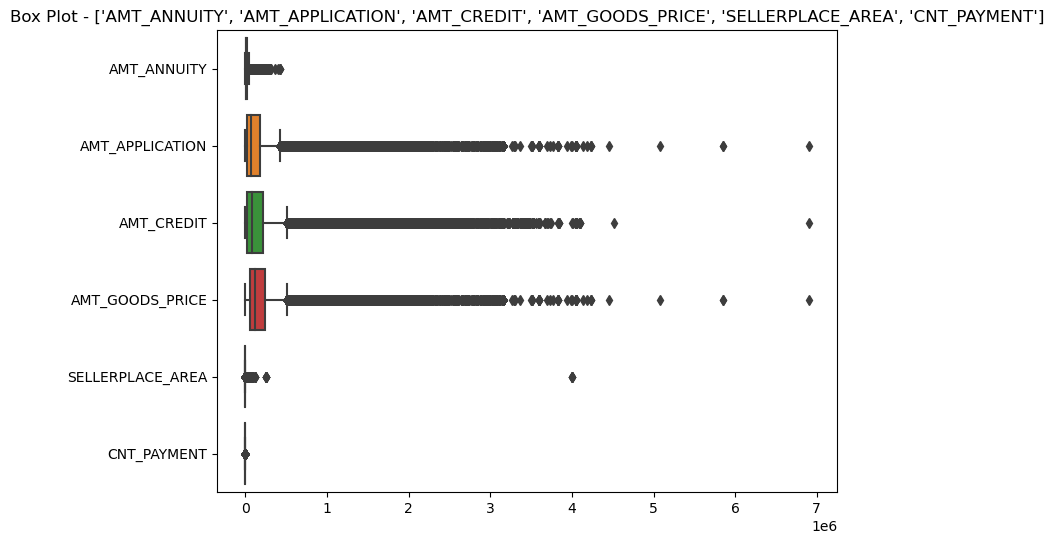

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns containing numerical data
prev_columns = [['AMT_ANNUITY', 'AMT_APPLICATION',
                 'AMT_CREDIT', 'AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','CNT_PAYMENT',
                 ]]

# Create box plots for numerical columns
for column in prev_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=prev_app_data[column], orient='h')
    plt.title(f'Box Plot - {column}')
    plt.show()


looking at the boxplot few columns such as 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION' seem to have a considerable amount of numbers from the o.95 quantile so we can consider them as outlier.

In [78]:
prev_app_data.head()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,271877,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,108129,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,122040,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,176158,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,202054,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


we can replace the null values with 1 as it is most in number in DAYS_TERMINATION

# # Merging two dataset

In [79]:
filtered_app_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CI

In [80]:
filtered_app_data.dtypes[filtered_app_data.dtypes == 'object'].index


Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

In [81]:
filtered_app_data.dtypes[filtered_app_data.dtypes != 'object'].index


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3'],
      dtype='object')

In [82]:
prev_app_data.dtypes[prev_app_data.dtypes == 'object'].index


Index(['NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [83]:
prev_app_data.dtypes[prev_app_data.dtypes != 'object'].index


Index(['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT'],
      dtype='object')

In [85]:
prev_app_data.dtypes

SK_ID_CURR                  int64
AMT_ANNUITY               float64
AMT_APPLICATION           float64
AMT_CREDIT                float64
AMT_GOODS_PRICE           float64
NAME_CASH_LOAN_PURPOSE     object
NAME_CONTRACT_STATUS       object
DAYS_DECISION               int64
NAME_PAYMENT_TYPE          object
CODE_REJECT_REASON         object
NAME_CLIENT_TYPE           object
NAME_GOODS_CATEGORY        object
NAME_PORTFOLIO             object
NAME_PRODUCT_TYPE          object
CHANNEL_TYPE               object
SELLERPLACE_AREA            int64
NAME_SELLER_INDUSTRY       object
CNT_PAYMENT               float64
NAME_YIELD_GROUP           object
PRODUCT_COMBINATION        object
dtype: object

In [84]:
Merg_data= pd.merge(filtered_app_data,prev_app_data,how='inner')
Merg_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,M,N,Y,0,202500.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,3648.0,1,1,0,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,F,N,N,0,270000.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,1186.0,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,0.535276,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,F,N,N,0,270000.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,1186.0,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,0.535276,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,F,N,N,0,270000.0,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,1186.0,1,1,0,1,1,0,Core staff,2.0,1,1,0,0,0,0,0,0,School,0.622246,0.535276,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,M,Y,Y,0,67500.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,4260.0,1,1,1,1,1,0,Laborers,1.0,2,2,0,0,0,0,0,0,Government,0.555912,0.729567,5357.250,24282.0,20106.0,24282.0,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


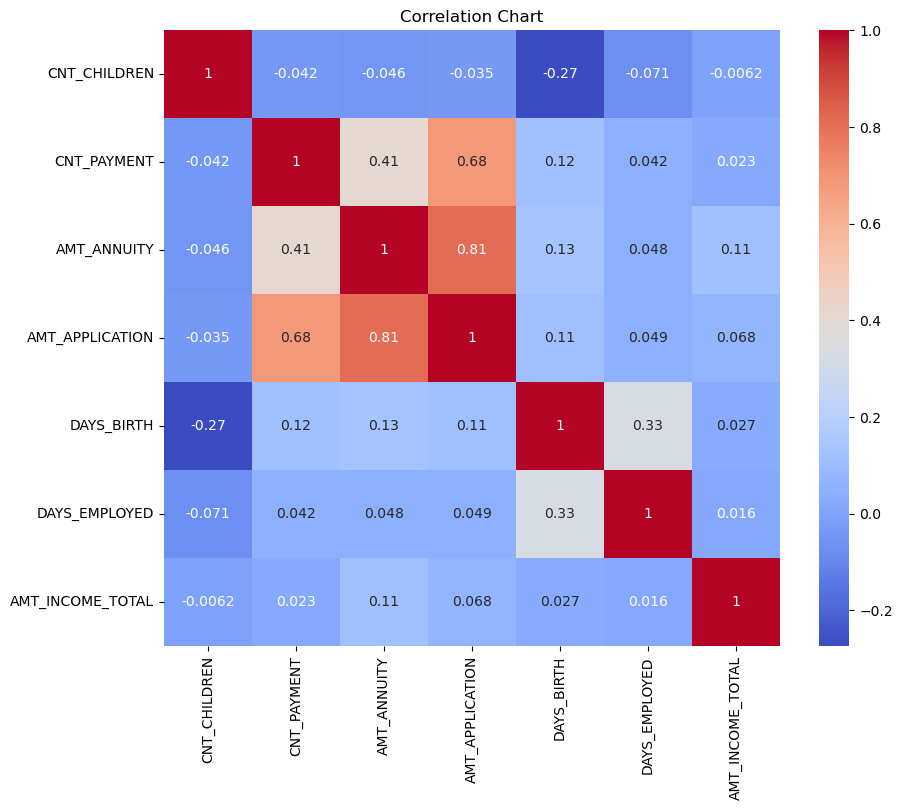

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the desired columns
columns = ['CNT_CHILDREN', 'CNT_PAYMENT', 'AMT_ANNUITY', 'AMT_APPLICATION',
            'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL']

# Create a correlation matrix
correlation_data = Merg_data[columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Chart')
plt.show()
